# TIME SERIES PREDICTION STATEWISE -- KERALA, MAHARASHTRA (in depth analysis) and DELHI  - TILL 29th APRIL 2020

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import preprocessing
import mplcursors
import datetime
from pmdarima.arima import auto_arima
from fbprophet import Prophet
import statsmodels.api as sm
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from tslearn.svm import TimeSeriesSVR
from sklearn.preprocessing import MinMaxScaler

In [2]:
from tensorflow.python.keras.layers import Dense, LSTM
from tensorflow.python.keras import Sequential

In [3]:
#https://machinelearningmastery.com/make-sample-forecasts-arima-python/
states =['Kerala', 'Delhi', 'Telengana', 'Haryana', 'Rajasthan', 'Uttar Pradesh',
 'Tamil Nadu', 'Ladakh', 'Karnataka', 'Maharashtra', 'Punjab',
 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry',
 'West Bengal', 'Chhattisgarh', 'Chandigarh', 'Gujarat', 'Himachal Pradesh',
 'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram',
 'Andaman and Nicobar Islands', 'Goa', 'Assam', 'Jharkhand',
 'Arunachal Pradesh', 'Tripura', 'Meghalaya']

In [4]:
df_state_recs =[]

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

for j in range(0, len(states)):
    stateName = states[j]
    df_per_State_features = pd.read_csv('features/' + stateName +'.csv')
    df_per_State_features = df_per_State_features.fillna(0)
    df_per_State_features["Active Cases"].replace({0:1}, inplace=True)
    df_state_recs.append(df_per_State_features)

# Analysis for Kerala

In [5]:
df_per_State_features = df_state_recs[0]
stateName = states[0]
data = df_per_State_features['Active Cases'].astype('int').values
    
daterange = df_per_State_features['Date'].values
no_Dates = len(daterange)

dateStart = daterange[0]
dateEnd = daterange[no_Dates - 1]


index= pd.date_range(start=dateStart, end=dateEnd, freq='D')
activecases = pd.Series(data, index)


(737485.0, 737546.0)

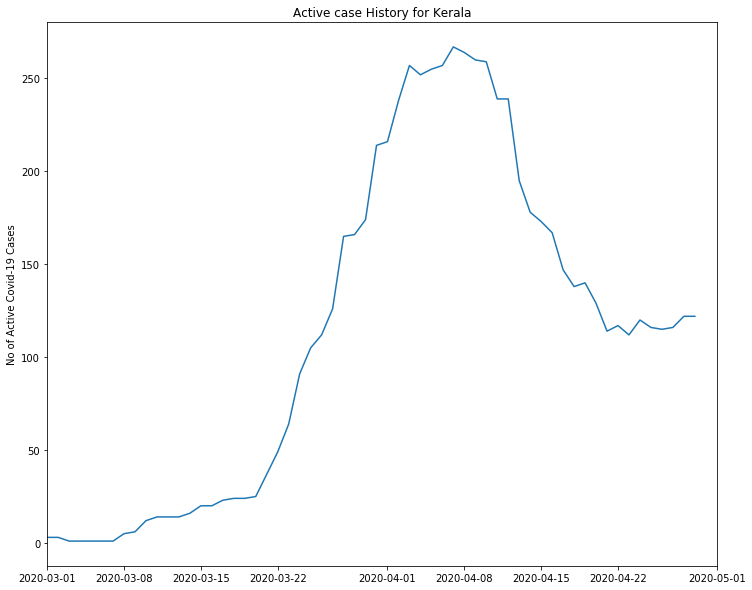

In [6]:
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(activecases)
ax.set_ylabel("No of Active Covid-19 Cases")
title = 'Active case History for ' + stateName
ax.set_title(title)
ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 5, 1)])


# Tseries Simple  Exponential Smoothing prediction for a period of 2 months 

Root Mean Square Error Holt's Linear Model:  90.80315419169916
(28,)
(28,)


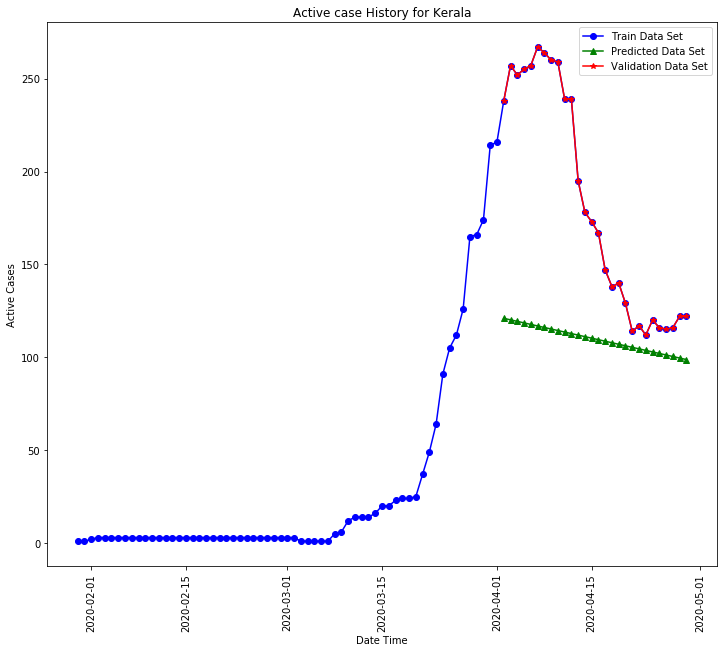

In [7]:
model_train=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]
data = valid['Active Cases'].astype('int').values

holt=Holt(np.asarray(df_per_State_features["Active Cases"])).fit(smoothing_level=1.2, smoothing_slope=0.2,optimized=False)
y_pred=valid.copy()

y_pred["Active Cases"]=holt.forecast(len(valid))
model_scores = []
model_scores.append(np.sqrt(mean_squared_error(valid["Active Cases"],y_pred["Active Cases"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(valid["Active Cases"],y_pred["Active Cases"])))

dateStart = daterange[int(df_per_State_features.shape[0]*0.70)]
index= pd.date_range(start=dateStart, end=dateEnd, freq='D')
predCases = pd.Series(holt.forecast(len(valid)), index)

index= pd.date_range(start=dateStart, end=dateEnd, freq='D')
predValid = pd.Series(data, index)

print(np.shape(index))
print(np.shape(predCases))

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(activecases, marker='o', color='blue', label="Train Data Set")
plt.plot(predCases, marker='^', color='green', label ="Predicted Data Set")
plt.plot(predValid, marker='*', color='red', label="Validation Data Set")
ax.set_ylabel("No of Active Covid-19 Cases")
title = 'Active case History for ' + stateName
ax.set_title(title)
plt.ylabel("Active Cases")
plt.xlabel("Date Time")
plt.xticks(rotation=90)
plt.legend()


# plt.figure(figsize=(10,5))
# ax = plt.plot(model_train["Date"], model_train["Active Cases"],label="Train Set",marker='o')
# valid["Active Cases"].plot(label="Validation Set",marker='*')
# plt.plot(valid["Date"], y_pred["Active Cases"], label="Holt's Linear Model Predicted Set",marker='^')
# plt.ylabel("Confirmed Cases")
# plt.xlabel("Date Time")
# plt.title("Confirmed Holt's Linear Model Prediction")
# plt.xticks(rotation=90)
# #ax.set_xlim(dateStart, dateEnd)
# #plt.xlim([dateStart, dateEnd])
# plt.legend()

# Simple and Exponential Smoothing TSeries Prediction

In [8]:
train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

totActiveCases = df_per_State_features['Active Cases'].astype('int').values

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_features.shape[0]*0.70):].values

In [9]:
len_forecast = np.shape(df_per_State_features['Active Cases'])[0]

fit1 = SimpleExpSmoothing(df_per_State_features['Active Cases']).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(len_forecast).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(df_per_State_features['Active Cases']).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(len_forecast).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(df_per_State_features['Active Cases']).fit()
fcast3 = fit3.forecast(len_forecast).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
fit4 = ExponentialSmoothing(df_per_State_features['Active Cases']).fit(damping_slope=.2, smoothing_level=.1)
fcast4 = fit3.forecast(len_forecast).rename(r'$\alpha=%s$'%fit4.model.params['smoothing_level'])


In [10]:
dateStart = df_per_State_features['Date'].values[0]
index= pd.date_range(start=dateStart, periods=no_Dates, freq='D')
pred_index= pd.date_range(start='2020-04-30', periods=len_forecast, freq='D')

pred_fcast1 =  pd.Series(fcast1.values, pred_index)
pred_fitval_fcast1 =  pd.Series(fit1.fittedvalues.values, index)

pred_fcast2 =  pd.Series(fcast2.values, pred_index)
pred_fitval_fcast2 =  pd.Series(fit2.fittedvalues.values, index)

pred_fcast3 =  pd.Series(fcast3.values, pred_index)
pred_fitval_fcast3 =  pd.Series(fit3.fittedvalues.values, index)

pred_fcast4 =  pd.Series(fcast4.values, pred_index)
pred_fitval_fcast4 =  pd.Series(fit4.fittedvalues.values, index)


Text(0.5, 1.0, 'Active case Flattening curve for Kerala')

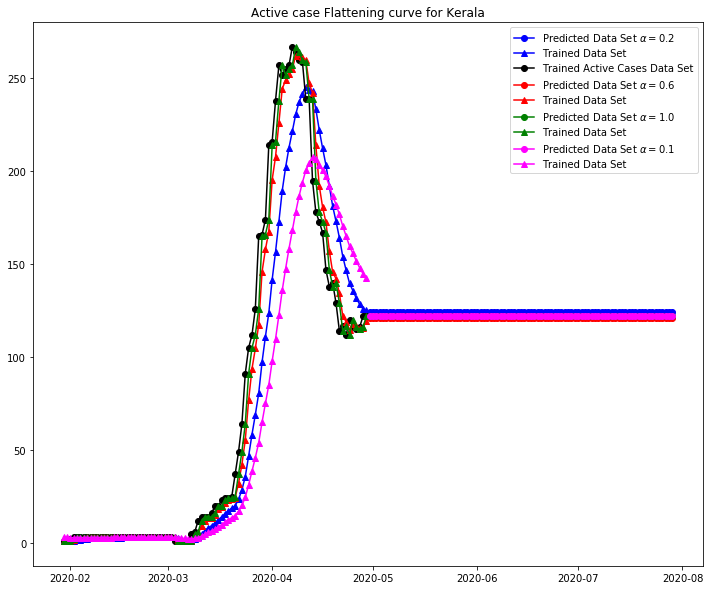

In [11]:
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(pred_fcast1, marker='o',color='blue',label ="Predicted Data Set " + r'$\alpha=0.2$')
plt.plot(pred_fitval_fcast1, marker='^',color='blue',label ="Trained Data Set")

plt.plot(activecases, marker='o', color='black', label ="Trained Active Cases Data Set")

plt.plot(pred_fcast2, marker='o',color='red',label ="Predicted Data Set " + r'$\alpha=0.6$')
plt.plot(pred_fitval_fcast2, marker='^',color='red',label ="Trained Data Set")

plt.plot(pred_fcast3, marker='o',color='green',label ="Predicted Data Set " + r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
plt.plot(pred_fitval_fcast3, marker='^',color='green',label ="Trained Data Set")

plt.plot(pred_fcast4, marker='o',color='magenta',label ="Predicted Data Set " r'$\alpha=%s$'%fit4.model.params['smoothing_level'])
plt.plot(pred_fitval_fcast4, marker='^',color='magenta',label ="Trained Data Set")

plt.legend()
ax.set_title('Active case Flattening curve for ' + stateName)


# Holt's Winter Tseries Prediction

In [12]:
train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_features.shape[0]*0.70):].values

In [13]:
len_forecast = np.shape(df_per_State_features['Active Cases'])[0]
fit1 = Holt(df_per_State_features['Active Cases']).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(len_forecast).rename("Holt's linear trend")
fit2 = Holt(df_per_State_features['Active Cases'], exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(len_forecast).rename("Exponential trend")
fit3 = Holt(df_per_State_features['Active Cases'], damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(len_forecast).rename("Additive damped trend")

In [14]:
dateStart = df_per_State_features['Date'].values[0]
index= pd.date_range(start=dateStart, periods=no_Dates, freq='D')
pred_index= pd.date_range(start='2020-04-30', periods=len_forecast, freq='D')

pred_fcast1 =  pd.Series(fcast1.values, pred_index)
pred_fitval_fcast1 =  pd.Series(fit1.fittedvalues.values, index)

pred_fcast2 =  pd.Series(fcast2.values, pred_index)
pred_fitval_fcast2 =  pd.Series(fit2.fittedvalues.values, index)

pred_fcast3 =  pd.Series(fcast3.values, pred_index)
pred_fitval_fcast3 =  pd.Series(fit3.fittedvalues.values, index)

Text(0.5, 1.0, "Holt's Winter Time Series Active Cases Prediction to Flatten the curve for Kerala")

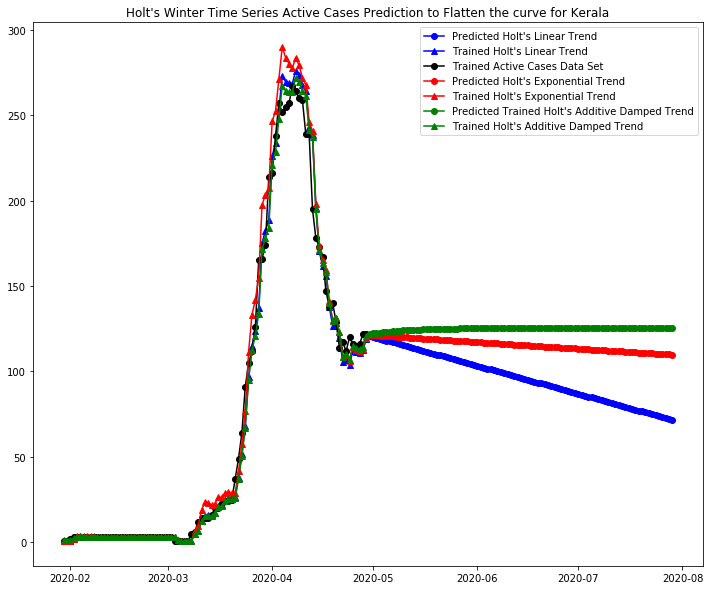

In [15]:
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(pred_fcast1, marker='o',color='blue',label ="Predicted Holt\'s Linear Trend")
plt.plot(pred_fitval_fcast1, marker='^',color='blue',label ="Trained Holt\'s Linear Trend")

plt.plot(activecases, marker='o', color='black', label ="Trained Active Cases Data Set")

plt.plot(pred_fcast2, marker='o',color='red',label ="Predicted Holt\'s Exponential Trend")
plt.plot(pred_fitval_fcast2, marker='^',color='red',label = "Trained Holt\'s Exponential Trend")

plt.plot(pred_fcast3, marker='o',color='green',label ="Predicted Trained Holt\'s Additive Damped Trend")
plt.plot(pred_fitval_fcast3, marker='^',color='green',label ="Trained Holt\'s Additive Damped Trend")

plt.legend()
ax.set_title('Holt\'s Winter Time Series Active Cases Prediction to Flatten the curve for ' + stateName)

In [16]:
fit1 = SimpleExpSmoothing(activecases).fit()
fit2 = Holt(activecases).fit()
fit3 = Holt(activecases,exponential=True).fit()
fit4 = Holt(activecases,damped=True).fit(damping_slope=0.98)
fit5 = Holt(activecases,exponential=True,damped=True).fit()
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'initial_level', 'initial_slope']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","SSE"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + [fit1.sse]
results["Holt's"] =         [fit2.params[p] for p in params] + [fit2.sse]
results["Exponential"] =    [fit3.params[p] for p in params] + [fit3.sse]
results["Additive"] =       [fit4.params[p] for p in params] + [fit4.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]
results


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.0,0.631579,0.743490,0.631579,0.640325
$\beta$,NaN,0.631579,0.633727,0.631579,0.640296
$\phi$,NaN,NaN,NaN,0.980000,0.813674
$l_0$,1.0,1.000000,0.742306,1.000000,0.975022
$b_0$,NaN,0.010000,1.832461,0.010000,1.357957
SSE,9645.0,6262.912330,7848.765796,6153.053327,6064.943636


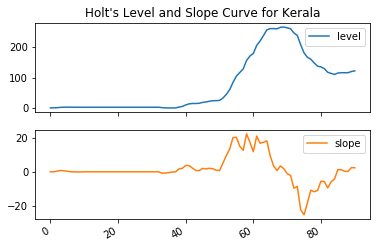

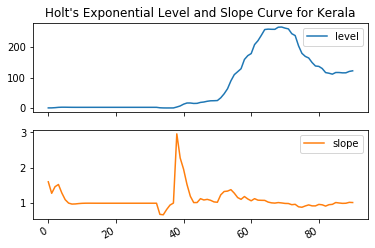

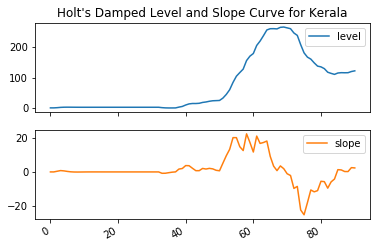

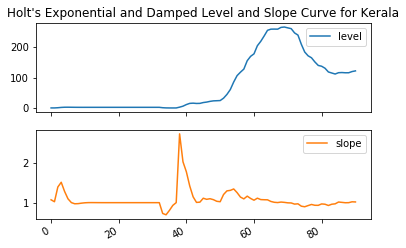

In [17]:
title_sub = ['Holt\'s',  'Holt\'s Exponential', 'Holt\'s Damped', 'Holt\'s Exponential and Damped']
count = 0
for fit in [fit2, fit3, fit4, fit5]:
    ax = pd.DataFrame(np.c_[fit.level,fit.slope]).rename(
        columns={0:'level',1:'slope'}).plot(subplots=True)

    title = title_sub[count] + ' Level and Slope Curve for ' +  stateName
    ax[0].set_title(title)
    count = count + 1 

# Analysis for Delhi


In [18]:
df_per_State_features = df_state_recs[1]
stateName = states[1]
data = df_per_State_features['Active Cases'].astype('double').values
    
daterange = df_per_State_features['Date'].values
no_Dates = len(daterange)

dateStart = daterange[0]
dateEnd = daterange[no_Dates - 1]


index= pd.date_range(start=dateStart, end=dateEnd, freq='D')
activecases = pd.Series(data, index)

(737485.0, 737546.0)

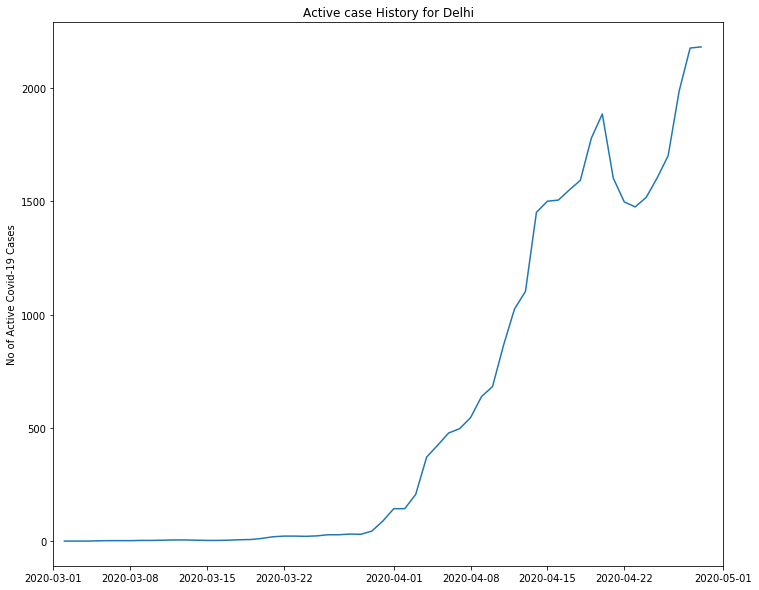

In [19]:
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(activecases)
ax.set_ylabel("No of Active Covid-19 Cases")
title = 'Active case History for ' + stateName
ax.set_title(title)
ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 5, 1)])

# Simple Exponential Smoothing and Holt's Winter model Prediction

In [20]:
train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_features.shape[0]*0.70):].values

In [21]:
len_forecast = np.shape(df_per_State_features['Active Cases'])[0]

fit1 = SimpleExpSmoothing(df_per_State_features['Active Cases']).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(len_forecast).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(df_per_State_features['Active Cases']).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(len_forecast).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(df_per_State_features['Active Cases']).fit()
fcast3 = fit3.forecast(len_forecast).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
fit4 = ExponentialSmoothing(df_per_State_features['Active Cases']).fit(damping_slope=.2, smoothing_level=.1)
fcast4 = fit3.forecast(len_forecast).rename(r'$\alpha=%s$'%fit4.model.params['smoothing_level'])

In [22]:
dateStart = df_per_State_features['Date'].values[0]
index= pd.date_range(start=dateStart, periods=no_Dates, freq='D')
pred_index= pd.date_range(start='2020-04-30', periods=len_forecast, freq='D')

pred_fcast1 =  pd.Series(fcast1.values, pred_index)
pred_fitval_fcast1 =  pd.Series(fit1.fittedvalues.values, index)

pred_fcast2 =  pd.Series(fcast2.values, pred_index)
pred_fitval_fcast2 =  pd.Series(fit2.fittedvalues.values, index)

pred_fcast3 =  pd.Series(fcast3.values, pred_index)
pred_fitval_fcast3 =  pd.Series(fit3.fittedvalues.values, index)

pred_fcast4 =  pd.Series(fcast4.values, pred_index)
pred_fitval_fcast4 =  pd.Series(fit4.fittedvalues.values, index)


Text(0.5, 1.0, 'Active case Flattening curve for Delhi')

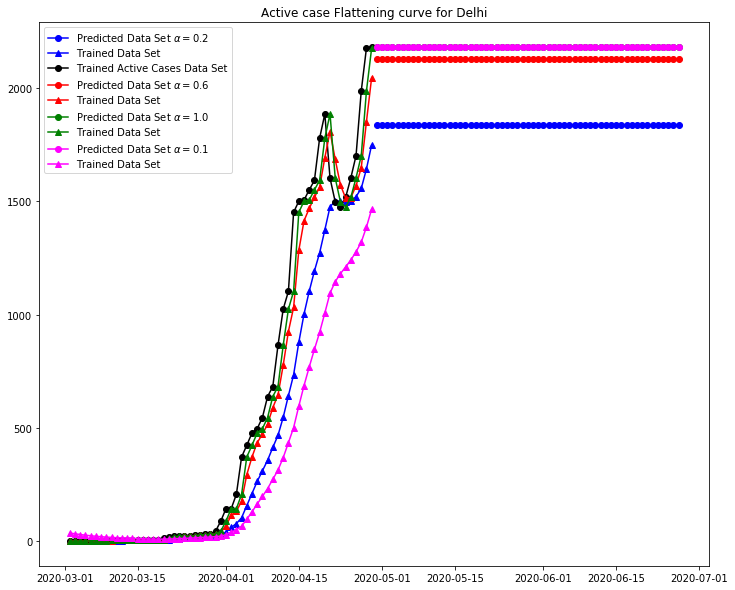

In [23]:
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(pred_fcast1, marker='o',color='blue',label ="Predicted Data Set " + r'$\alpha=0.2$')
plt.plot(pred_fitval_fcast1, marker='^',color='blue',label ="Trained Data Set")

plt.plot(activecases, marker='o', color='black', label ="Trained Active Cases Data Set")

plt.plot(pred_fcast2, marker='o',color='red',label ="Predicted Data Set " + r'$\alpha=0.6$')
plt.plot(pred_fitval_fcast2, marker='^',color='red',label ="Trained Data Set")

plt.plot(pred_fcast3, marker='o',color='green',label ="Predicted Data Set " + r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
plt.plot(pred_fitval_fcast3, marker='^',color='green',label ="Trained Data Set")

plt.plot(pred_fcast4, marker='o',color='magenta',label ="Predicted Data Set " r'$\alpha=%s$'%fit4.model.params['smoothing_level'])
plt.plot(pred_fitval_fcast4, marker='^',color='magenta',label ="Trained Data Set")

plt.legend()
ax.set_title('Active case Flattening curve for ' + stateName)

# Holt's Winter Tseries Prediction

In [24]:
train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_features.shape[0]*0.70):].values

In [25]:
len_forecast = np.shape(df_per_State_features['Active Cases'])[0]
fit1 = Holt(df_per_State_features['Active Cases']).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(len_forecast).rename("Holt's linear trend")
fit2 = Holt(df_per_State_features['Active Cases'], exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(len_forecast).rename("Exponential trend")
fit3 = Holt(df_per_State_features['Active Cases'], damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(len_forecast).rename("Additive damped trend")

In [26]:
dateStart = df_per_State_features['Date'].values[0]
index= pd.date_range(start=dateStart, periods=no_Dates, freq='D')
pred_index= pd.date_range(start='2020-04-30', periods=len_forecast, freq='D')

pred_fcast1 =  pd.Series(fcast1.values, pred_index)
pred_fitval_fcast1 =  pd.Series(fit1.fittedvalues.values, index)

pred_fcast2 =  pd.Series(fcast2.values, pred_index)
pred_fitval_fcast2 =  pd.Series(fit2.fittedvalues.values, index)

pred_fcast3 =  pd.Series(fcast3.values, pred_index)
pred_fitval_fcast3 =  pd.Series(fit3.fittedvalues.values, index)

Text(0.5, 1.0, "Holt's Winter Time Series Active Cases Prediction to Flatten the curve for Delhi")

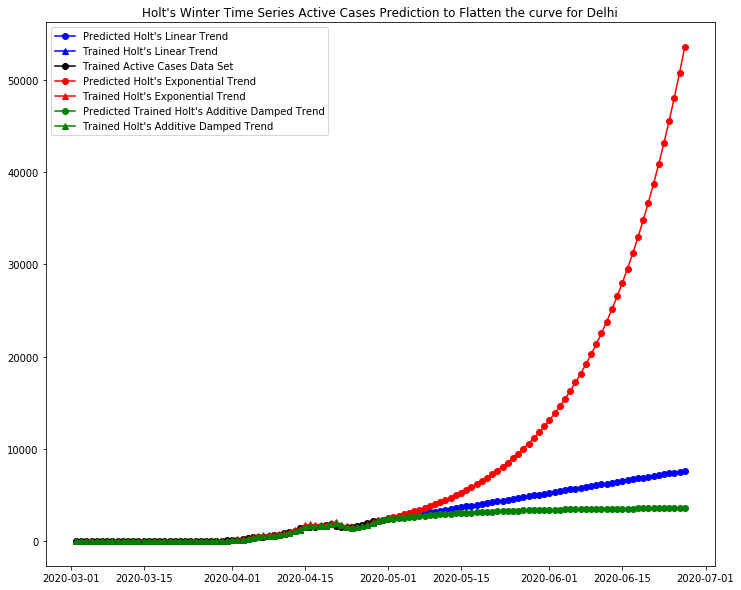

In [27]:
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(pred_fcast1, marker='o',color='blue',label ="Predicted Holt\'s Linear Trend")
plt.plot(pred_fitval_fcast1, marker='^',color='blue',label ="Trained Holt\'s Linear Trend")

plt.plot(activecases, marker='o', color='black', label ="Trained Active Cases Data Set")

plt.plot(pred_fcast2, marker='o',color='red',label ="Predicted Holt\'s Exponential Trend")
plt.plot(pred_fitval_fcast2, marker='^',color='red',label = "Trained Holt\'s Exponential Trend")

plt.plot(pred_fcast3, marker='o',color='green',label ="Predicted Trained Holt\'s Additive Damped Trend")
plt.plot(pred_fitval_fcast3, marker='^',color='green',label ="Trained Holt\'s Additive Damped Trend")

plt.legend()
ax.set_title('Holt\'s Winter Time Series Active Cases Prediction to Flatten the curve for ' + stateName)


In [28]:
fit1 = SimpleExpSmoothing(activecases).fit()
fit2 = Holt(activecases).fit()
fit3 = Holt(activecases,exponential=True).fit()
fit4 = Holt(activecases,damped=True).fit(damping_slope=0.98)
fit5 = Holt(activecases,exponential=True,damped=True).fit()
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'initial_level', 'initial_slope']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","SSE"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + [fit1.sse]
results["Holt's"] =         [fit2.params[p] for p in params] + [fit2.sse]
results["Exponential"] =    [fit3.params[p] for p in params] + [fit3.sse]
results["Additive"] =       [fit4.params[p] for p in params] + [fit4.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]
results

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.0,1.000000,1.000000,1.000000,1.000000
$\beta$,NaN,0.129840,0.000000,0.195903,1.000000
$\phi$,NaN,NaN,NaN,0.980000,0.423663
$l_0$,1.0,0.694029,1.000000,0.967153,1.000000
$b_0$,NaN,1.782128,1.045259,0.125165,2.360367
SSE,522035.0,420735.485094,426105.821008,418845.288866,401189.930046


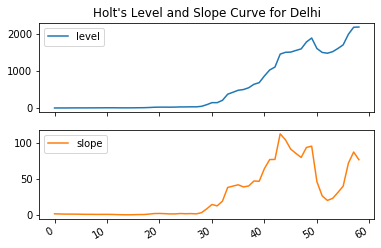

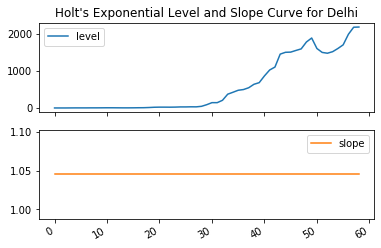

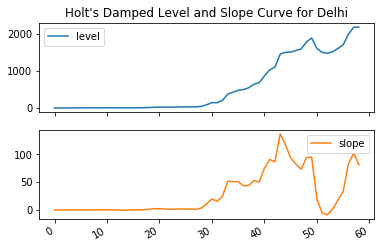

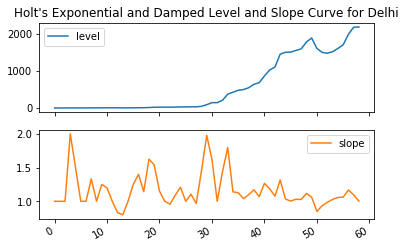

In [29]:
title_sub = ['Holt\'s', 'Holt\'s Exponential', 'Holt\'s Damped', 'Holt\'s Exponential and Damped']
count = 0
for fit in [fit2, fit3, fit4, fit5]:
    ax = pd.DataFrame(np.c_[fit.level,fit.slope]).rename(
        columns={0:'level',1:'slope'}).plot(subplots=True)
    

    title = title_sub[count] + ' Level and Slope Curve for ' +  stateName
    ax[0].set_title(title)
    count = count + 1 

# Analysis for Maharashtra

# Regression Models

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df_per_State_features = df_state_recs[9]
stateName = states[9]

data = df_per_State_features['Active Cases'].astype('double').values
daterange = df_per_State_features['Date'].values
no_Dates = len(daterange)

dateStart = daterange[0]
dateEnd = daterange[no_Dates - 1]

date_index= pd.date_range(start=dateStart, end=dateEnd, freq='D')

activecases = pd.Series(data, date_index)
df_per_State_sel_features = df_per_State_features.copy(deep=False)

df_per_State_sel_features["Days Since"]=date_index-date_index[0]
df_per_State_sel_features["Days Since"]=df_per_State_sel_features["Days Since"].dt.days


df_per_State_sel_features = df_per_State_sel_features.iloc[:,[4,5, 7,8,9,10,11,12,13,14,15,16,23]]
df_per_State_sel_features.head()


,Cured/Discharged/Migrated,Death,Active Cases,LiteracyRate,PopulationDensity,ElderlyRate,DistrictsEffected,NoRedZones,NoOrangeZones,NoGreenZones,InternationalAirports,IntAirportPassenger,Rate_per_7_days
0,0,0,2,82.3,365,9.9,32,14,16,6,3,67.0,0.0
1,0,0,5,82.3,365,9.9,32,14,16,6,3,67.0,0.0
2,0,0,10,82.3,365,9.9,32,14,16,6,3,67.0,0.0
3,0,0,11,82.3,365,9.9,32,14,16,6,3,67.0,0.0
4,0,0,11,82.3,365,9.9,32,14,16,6,3,67.0,0.0


In [31]:
data = df_per_State_features['Active Cases'].astype('double').values
daterange = df_per_State_features['Date']
no_Dates = len(daterange)

dateStart = daterange[0]
dateEnd = daterange[no_Dates - 1]


df_per_State_features["Days Since"]=date_index-date_index[0]
df_per_State_features["Days Since"]=df_per_State_features["Days Since"].dt.days


train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

ml_all_f =df_per_State_sel_features.values
train_ml_all_f =df_per_State_sel_features.iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_ml_all_f =df_per_State_sel_features.iloc[int(df_per_State_sel_features.shape[0]*0.70):].values

# Linear Regression Model

In [32]:
model_scores=[]

dateVals =  df_per_State_features["Days Since"].values.reshape(-1,1)
traindateVals = dateVals[:int(df_per_State_features.shape[0]*0.70)]
validDateVals = dateVals[int(df_per_State_features.shape[0]*0.70):]

totActiveCases = activecases.values.reshape(-1,1)
trainActiveCases =totActiveCases[:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

In [33]:
lin_reg=LinearRegression(normalize=True)
lin_reg.fit(train_ml_all_f,trainActiveCases)
prediction_valid_linreg=lin_reg.predict(valid_ml_all_f)

In [34]:
np.shape(df_per_State_sel_features)

(52, 13)

In [35]:
np.shape(prediction_valid_linreg)

(16, 1)

In [36]:
np.shape(validActiveCases)

(16, 1)

In [37]:
model_scores.append(np.sqrt(mean_squared_error(validActiveCases,prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(validActiveCases,prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  2.25088454876906e-12


# Plotting Linear Regression

(52, 13)


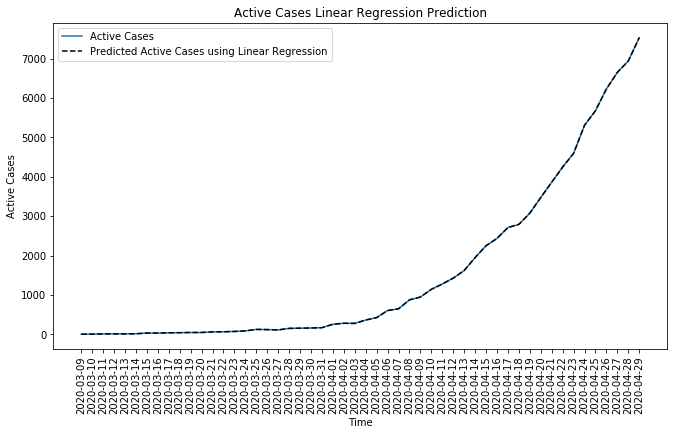

In [38]:
print(np.shape(ml_all_f))

# With multiple input features
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(ml_all_f)
plt.plot(totActiveCases,label="Active Cases")
plt.plot(df_per_State_features['Date'], prediction_linreg, linestyle='--',label="Predicted Active Cases using Linear Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Active Cases')
plt.title("Active Cases Linear Regression Prediction")
plt.xticks(rotation=90)
plt.legend()

# Polynomial Regression Model


In [39]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_reg = PolynomialFeatures(degree = 7) 

poly_reg = make_pipeline(PolynomialFeatures(3), Ridge())
poly_reg.fit(train_ml_all_f,trainActiveCases)
poly_pred = poly_reg.predict(valid_ml_all_f)


model_scores.append(np.sqrt(mean_squared_error(validActiveCases,poly_pred)))
print("Root Mean Square Error for Polynomial Regression: ",np.sqrt(mean_squared_error(validActiveCases,poly_pred)))

Root Mean Square Error for Polynomial Regression:  0.0031625644625374277


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.



# Plotting PolyNomial Regression

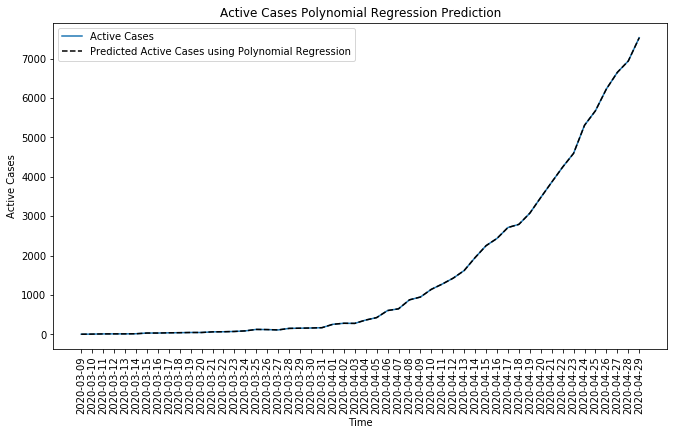

In [40]:
# With multiple input features
plt.figure(figsize=(11,6))
pred_poly=poly_reg.predict(ml_all_f)
plt.plot(totActiveCases,label="Active Cases")
plt.plot(df_per_State_features['Date'], pred_poly, linestyle='--',label="Predicted Active Cases using Polynomial Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Active Cases')
plt.title("Active Cases Polynomial Regression Prediction")
plt.xticks(rotation=90)
plt.legend()

# Lasso  Regression

In [41]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

lasso_reg = Lasso(alpha=.8,normalize=True, max_iter=1e5)

poly_reg = make_pipeline(PolynomialFeatures(3), lasso_reg)
poly_reg.fit(train_ml_all_f,trainActiveCases)
poly_pred = poly_reg.predict(valid_ml_all_f)


model_scores.append(np.sqrt(mean_squared_error(validActiveCases,poly_pred)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(validActiveCases,poly_pred)))

Root Mean Square Error for Linear Regression:  50.511841681532175


# Plotting Lasso Regression

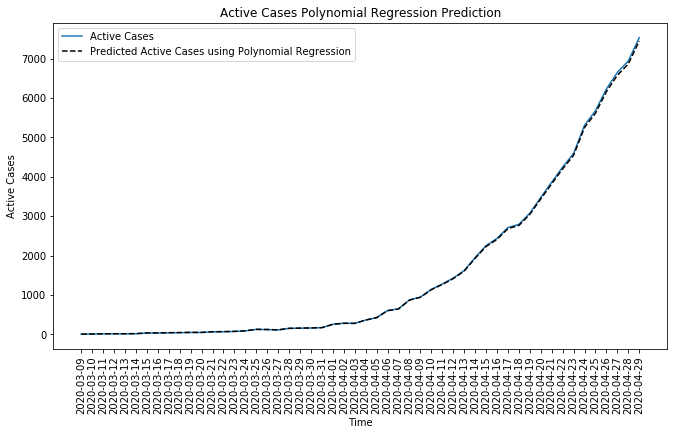

In [42]:
# With multiple input features
plt.figure(figsize=(11,6))
pred_poly=poly_reg.predict(ml_all_f)
plt.plot(totActiveCases,label="Active Cases")
plt.plot(df_per_State_features['Date'], pred_poly, linestyle='--',label="Predicted Active Cases using Polynomial Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Active Cases')
plt.title("Active Cases Polynomial Regression Prediction")
plt.xticks(rotation=90)
plt.legend()

In [43]:
df_per_State_features = df_state_recs[9]
stateName = states[9]

data = df_per_State_features['Active Cases'].astype('double').values
    
daterange = df_per_State_features['Date'].values
no_Dates = len(daterange)

dateStart = daterange[0]
dateEnd = daterange[no_Dates - 1]


index= pd.date_range(start=dateStart, end=dateEnd, freq='D')
activecases = pd.Series(data, index)

(737485.0, 737546.0)

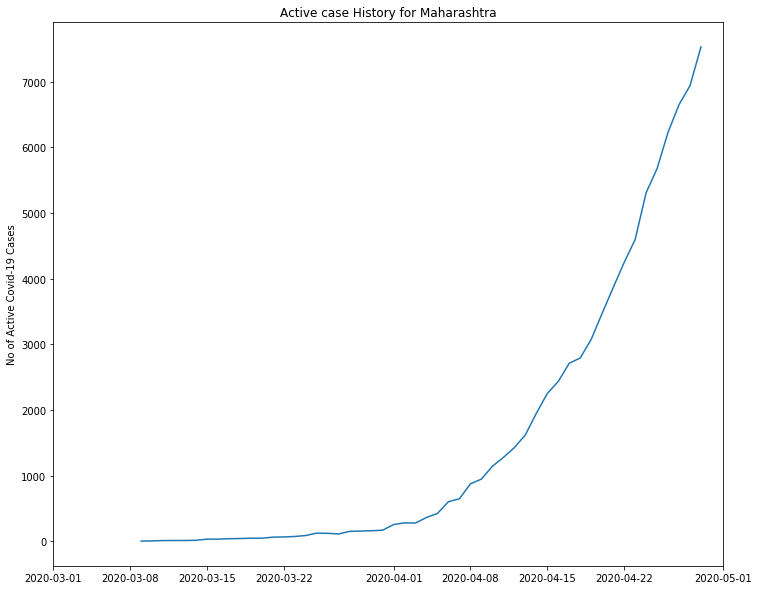

In [44]:
f, ax = plt.subplots(1,1, figsize=(12,10))
plt.plot(activecases)
ax.set_ylabel("No of Active Covid-19 Cases")
title = 'Active case History for ' + stateName
ax.set_title(title)
ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 5, 1)])

# Simple Exponential Smoothing and Holt's Winter Model for Maharashtra

In [45]:
train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values

In [46]:
len_forecast = np.shape(df_per_State_features['Active Cases'])[0]

fit1 = SimpleExpSmoothing(df_per_State_features['Active Cases']).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(len_forecast).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(df_per_State_features['Active Cases']).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(len_forecast).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(df_per_State_features['Active Cases']).fit()
fcast3 = fit3.forecast(len_forecast).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
fit4 = ExponentialSmoothing(df_per_State_features['Active Cases']).fit(damping_slope=.2, smoothing_level=.1)
fcast4 = fit3.forecast(len_forecast).rename(r'$\alpha=%s$'%fit4.model.params['smoothing_level'])

In [47]:
dateStart = df_per_State_features['Date'].values[0]
index= pd.date_range(start=dateStart, periods=no_Dates, freq='D')
pred_index= pd.date_range(start='2020-04-30', periods=len_forecast, freq='D')

pred_fcast1 =  pd.Series(fcast1.values, pred_index)
pred_fitval_fcast1 =  pd.Series(fit1.fittedvalues.values, index)

pred_fcast2 =  pd.Series(fcast2.values, pred_index)
pred_fitval_fcast2 =  pd.Series(fit2.fittedvalues.values, index)

pred_fcast3 =  pd.Series(fcast3.values, pred_index)
pred_fitval_fcast3 =  pd.Series(fit3.fittedvalues.values, index)

pred_fcast4 =  pd.Series(fcast4.values, pred_index)
pred_fitval_fcast4 =  pd.Series(fit4.fittedvalues.values, index)

Text(0.5, 1.0, 'Active case Flattening curve for Maharashtra')

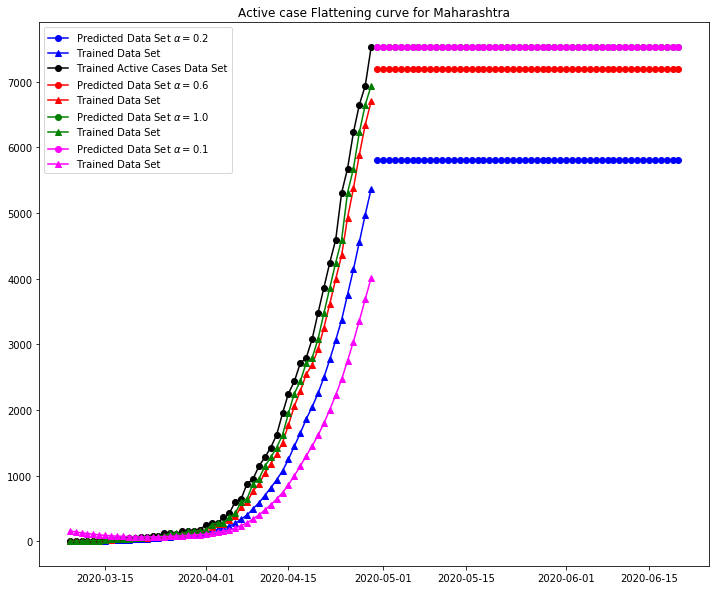

In [48]:
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(pred_fcast1, marker='o',color='blue',label ="Predicted Data Set " + r'$\alpha=0.2$')
plt.plot(pred_fitval_fcast1, marker='^',color='blue',label ="Trained Data Set")

plt.plot(activecases, marker='o', color='black', label ="Trained Active Cases Data Set")

plt.plot(pred_fcast2, marker='o',color='red',label ="Predicted Data Set " + r'$\alpha=0.6$')
plt.plot(pred_fitval_fcast2, marker='^',color='red',label ="Trained Data Set")

plt.plot(pred_fcast3, marker='o',color='green',label ="Predicted Data Set " + r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
plt.plot(pred_fitval_fcast3, marker='^',color='green',label ="Trained Data Set")

plt.plot(pred_fcast4, marker='o',color='magenta',label ="Predicted Data Set " r'$\alpha=%s$'%fit4.model.params['smoothing_level'])
plt.plot(pred_fitval_fcast4, marker='^',color='magenta',label ="Trained Data Set")

plt.legend()
ax.set_title('Active case Flattening curve for ' + stateName)

# Holt's Winter Tseries Prediction

In [49]:
train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values

In [50]:
len_forecast = np.shape(df_per_State_features['Active Cases'])[0]
fit1 = Holt(df_per_State_features['Active Cases']).fit(smoothing_level=1.1, smoothing_slope=1.6, optimized=False)
fcast1 = fit1.forecast(len_forecast).rename("Holt's linear trend")
fit2 = Holt(df_per_State_features['Active Cases'], exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(len_forecast).rename("Exponential trend")
fit3 = Holt(df_per_State_features['Active Cases'], damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(len_forecast).rename("Additive damped trend")

In [51]:
dateStart = df_per_State_features['Date'].values[0]
index= pd.date_range(start=dateStart, periods=no_Dates, freq='D')
pred_index= pd.date_range(start='2020-04-30', periods=len_forecast, freq='D')

pred_fcast1 =  pd.Series(fcast1.values, pred_index)
pred_fitval_fcast1 =  pd.Series(fit1.fittedvalues.values, index)

pred_fcast2 =  pd.Series(fcast2.values, pred_index)
pred_fitval_fcast2 =  pd.Series(fit2.fittedvalues.values, index)

pred_fcast3 =  pd.Series(fcast3.values, pred_index)
pred_fitval_fcast3 =  pd.Series(fit3.fittedvalues.values, index)

Text(0.5, 1.0, "Holt's Winter Time Series Active Cases Prediction to Flatten the curve for Maharashtra")

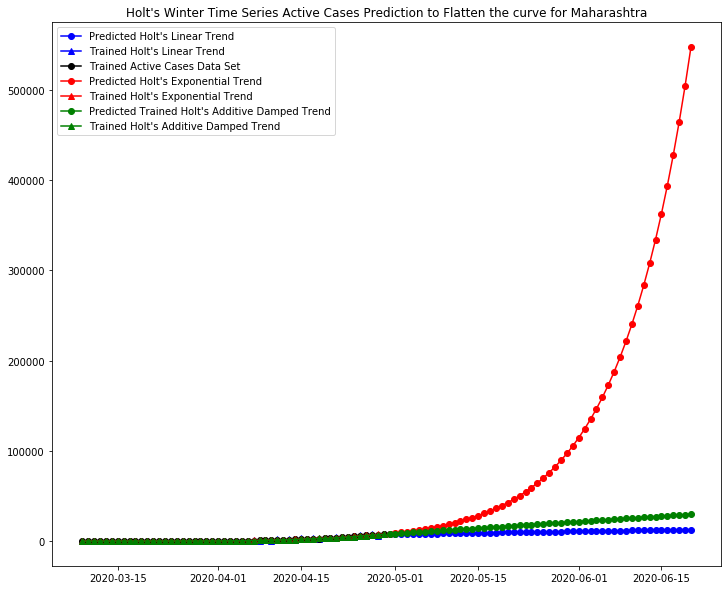

In [52]:
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(pred_fcast1, marker='o',color='blue',label ="Predicted Holt\'s Linear Trend")
plt.plot(pred_fitval_fcast1, marker='^',color='blue',label ="Trained Holt\'s Linear Trend")

plt.plot(activecases, marker='o', color='black', label ="Trained Active Cases Data Set")

plt.plot(pred_fcast2, marker='o',color='red',label ="Predicted Holt\'s Exponential Trend")
plt.plot(pred_fitval_fcast2, marker='^',color='red',label = "Trained Holt\'s Exponential Trend")

plt.plot(pred_fcast3, marker='o',color='green',label ="Predicted Trained Holt\'s Additive Damped Trend")
plt.plot(pred_fitval_fcast3, marker='^',color='green',label ="Trained Holt\'s Additive Damped Trend")

plt.legend()
ax.set_title('Holt\'s Winter Time Series Active Cases Prediction to Flatten the curve for ' + stateName)

In [53]:
fit1 = SimpleExpSmoothing(activecases).fit()
fit2 = Holt(activecases).fit()
fit3 = Holt(activecases,exponential=True).fit()
fit4 = Holt(activecases,damped=True).fit(damping_slope=0.98)
fit5 = Holt(activecases,exponential=True,damped=True).fit()
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'initial_level', 'initial_slope']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","SSE"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + [fit1.sse]
results["Holt's"] =         [fit2.params[p] for p in params] + [fit2.sse]
results["Exponential"] =    [fit3.params[p] for p in params] + [fit3.sse]
results["Additive"] =       [fit4.params[p] for p in params] + [fit4.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]
results

,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.0,0.733689,0.857474,0.704173,0.787052
$\beta$,NaN,0.596041,0.443212,0.704173,0.000000
$\phi$,NaN,NaN,NaN,0.980000,0.965309
$l_0$,2.0,1.133045,10.158076,1.970172,2.698361
$b_0$,NaN,1.728658,0.371875,2.955297,1.595756
SSE,2766034.0,391447.021196,478453.853791,405426.499867,290472.487416


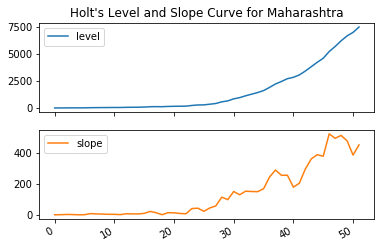

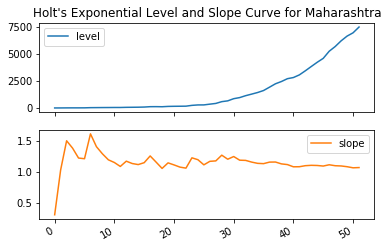

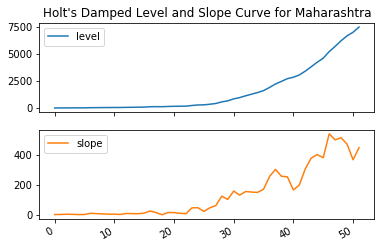

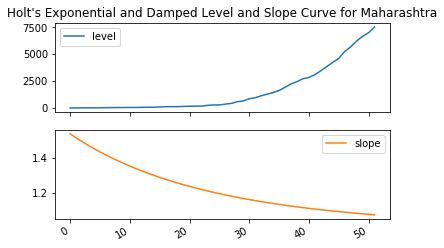

In [54]:
title_sub = ['Holt\'s', 'Holt\'s Exponential', 'Holt\'s Damped', 'Holt\'s Exponential and Damped']
count = 0
for fit in [fit2, fit3, fit4, fit5]:
    ax = pd.DataFrame(np.c_[fit.level,fit.slope]).rename(
        columns={0:'level',1:'slope'}).plot(subplots=True)

    title = title_sub[count] + ' Level and Slope Curve for ' +  stateName
    ax[0].set_title(title)
    count = count + 1 

# Auto Co-relation plot 


# Auto Correlation and Dickey-Fuller test 

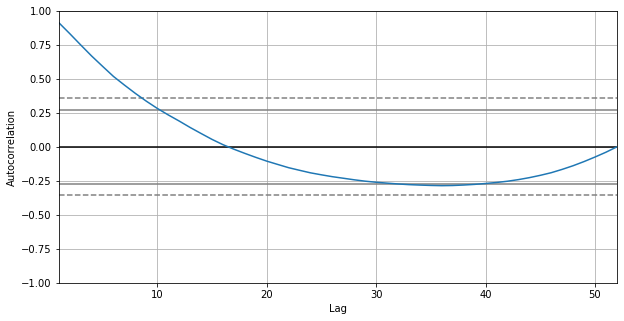

In [55]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10, 5))
autocorrelation_plot(activecases)

In [56]:
from statsmodels.tsa.stattools import adfuller
print("Results of Dickey-Fuller test for Original Time Series")
dftest = adfuller(activecases, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller test for Original Time Series
Test Statistic                 -1.010263
p-value                         0.749503
#Lags Used                     10.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


In [57]:
log_series=np.log(activecases)
print("Results of Dickey-Fuller test for Log Transformed Time-Series")
dftest = adfuller((log_series.diff().diff()).dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)
stationary=(log_series.diff().diff()).dropna()

Results of Dickey-Fuller test for Log Transformed Time-Series
Test Statistic                 -2.404740
p-value                         0.140403
#Lags Used                     11.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


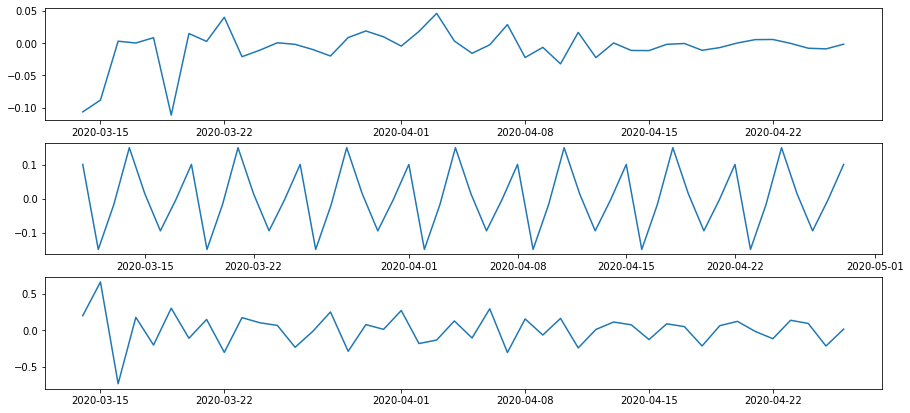

In [58]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 1,figsize=(15,7))
import statsmodels.api as sm
results=sm.tsa.seasonal_decompose(stationary)
ax1.plot(results.trend)
ax2.plot(results.seasonal)
ax3.plot(results.resid)

# Preparing Datasets

In [59]:
df_per_State_features = df_state_recs[9]

train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values


In [60]:
#TO DO
# plt.figure(figsize=(15,5))
# sns.heatmap(totActiveCases, annot=True, fmt='D', cmap='YlGnBu')
# plt.show()

# AR, MA and ARIMA Model

# AR model

In [61]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   36
Model:                     ARMA(2, 0)   Log Likelihood                -207.841
Method:                       css-mle   S.D. of innovations             58.824
Date:                Sun, 28 Jun 2020   AIC                            423.683
Time:                        18:26:56   BIC                            430.017
Sample:                             0   HQIC                           425.893
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        324.8580        nan        nan        nan         nan         nan
ar.L1.y        1.7401    1.7e-05   1.02e+05      0.000       1.740       1.740
ar.L2.y       -0.7401   7.24e-06  -1.02e+05      0.0

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning:

invalid value encountered in sqrt

/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in greater

/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in less

/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning:

invalid value encountered in less_equal



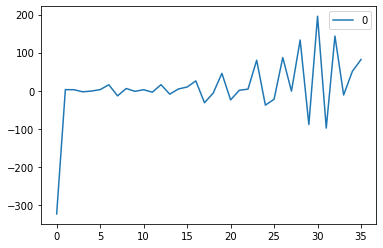

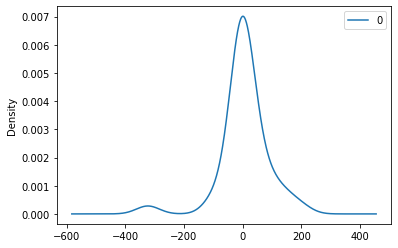

                0
count   36.000000
mean     6.672657
std     80.571075
min   -322.858013
25%     -9.397125
50%      2.779647
75%     18.474560
max    195.434863
Root Mean Square Error for AR Model:  2834.8597230135583


In [62]:
model_ar = ARIMA(trainActiveCases, order=(2, 0, 0))  
model_ar_fit = model_ar.fit()  

prediction_ar=model_ar_fit.forecast(len(validActiveCases))[0]

print(model_ar_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_ar_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

model_scores.append(np.sqrt(mean_squared_error(validActiveCases,prediction_ar)))
print("Root Mean Square Error for AR Model: ",np.sqrt(mean_squared_error(validActiveCases,prediction_ar)))

Text(0.5, 1.0, 'Active Cases AR Model Forecasting for state Maharashtra')

<Figure size 720x360 with 0 Axes>

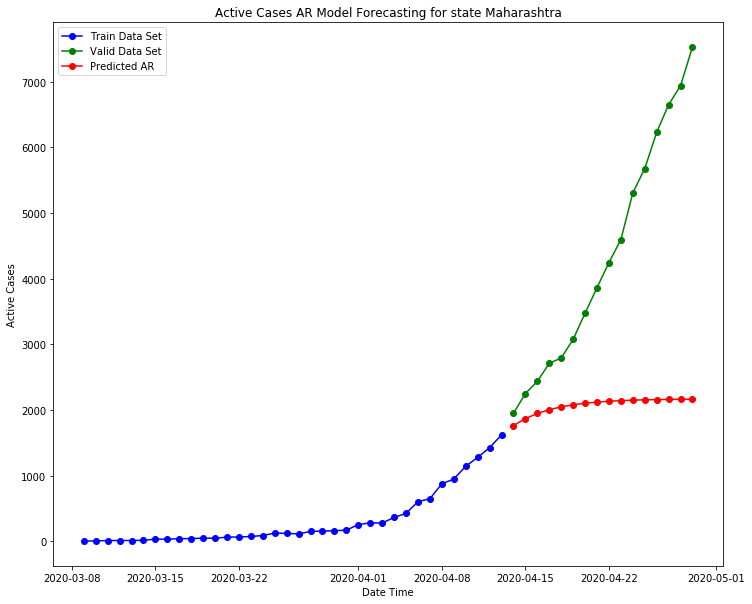

In [63]:
plt.figure(figsize=(10,5))

index= pd.date_range(start=train_dates[0], periods=len(train_dates), freq='D')
valid_index = pd.date_range(start=valid_dates[0], periods=len(valid_dates), freq='D')

train_active =  pd.Series(train_ml['Active Cases'].values, index)
valid_active =  pd.Series(valid_ml['Active Cases'].values, valid_index)
pred_active =  pd.Series(prediction_ar, valid_index)

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, marker='o',color='blue',label ="Train Data Set")
plt.plot(valid_active, marker='o',color='green',label ="Valid Data Set")
plt.plot(pred_active, marker='o',color='red',label ="Predicted AR")

plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Active Cases')
plt.title("Active Cases AR Model Forecasting for state " + stateName)


# MA Model

In [64]:
df_per_State_features = df_state_recs[9]

train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   36
Model:                     ARMA(0, 2)   Log Likelihood                -236.043
Method:                       css-mle   S.D. of innovations            155.308
Date:                Sun, 28 Jun 2020   AIC                            480.085
Time:                        18:27:00   BIC                            486.419
Sample:                             0   HQIC                           482.296
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        356.1297     87.381      4.076      0.000     184.865     527.394
ma.L1.y        1.4614      0.200      7.293      0.000       1.069       1.854
ma.L2.y        1.0000      0.130      7.667      0.0

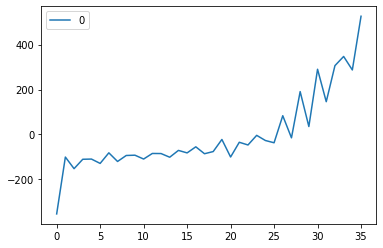

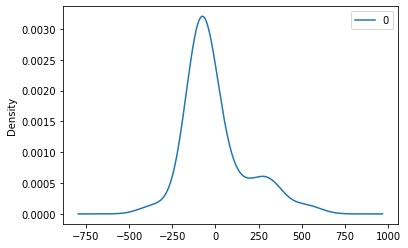

                0
count   36.000000
mean    -4.846858
std    172.640522
min   -354.129673
25%   -100.679716
50%    -73.803301
75%      5.690787
max    526.450580
Root Mean Square Error for MA Model:  4345.5665091474975


In [65]:
model_ma = ARIMA(trainActiveCases, order=(0, 0, 2))  
model_ma_fit = model_ma.fit()  

prediction_ma=model_ma_fit.forecast(len(validActiveCases))[0]

print(model_ma_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_ma_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

model_scores.append(np.sqrt(mean_squared_error(validActiveCases,prediction_ma)))
print("Root Mean Square Error for MA Model: ",np.sqrt(mean_squared_error(validActiveCases,prediction_ma)))

Text(0.5, 1.0, 'Active Cases MA Model Forecasting for state Maharashtra')

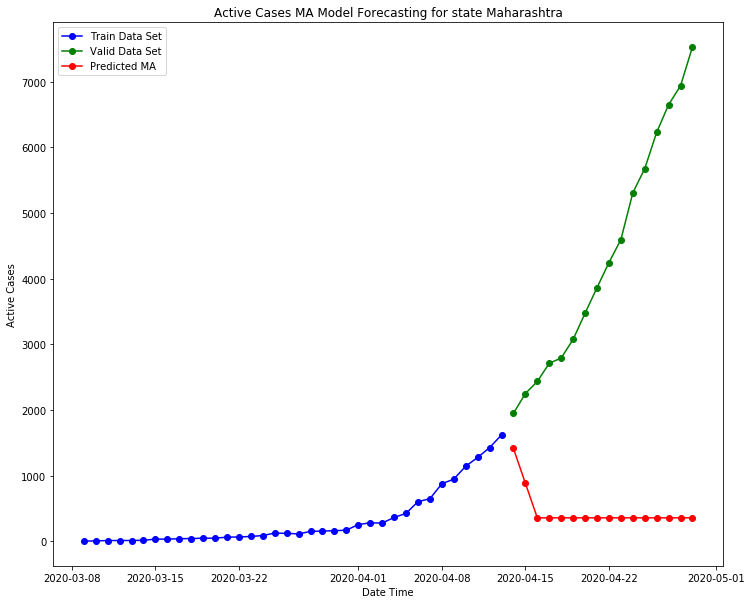

In [66]:
index= pd.date_range(start=train_dates[0], periods=len(train_dates), freq='D')
valid_index = pd.date_range(start=valid_dates[0], periods=len(valid_dates), freq='D')

train_active =  pd.Series(train_ml['Active Cases'].values, index)
valid_active =  pd.Series(valid_ml['Active Cases'].values, valid_index)
pred_active =  pd.Series(prediction_ma, valid_index)

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, marker='o',color='blue',label ="Train Data Set")
plt.plot(valid_active, marker='o',color='green',label ="Valid Data Set")
plt.plot(pred_active, marker='o',color='red',label ="Predicted MA")

plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Active Cases')
plt.title("Active Cases MA Model Forecasting for state " + stateName)

# ARIMA Model

In [67]:
df_per_State_features = df_state_recs[9]

train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:220: RuntimeWarning:

divide by zero encountered in true_divide

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning:

overflow encountered in exp

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning:

invalid value encountered in true_divide

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning:

overflow encountered in exp

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning:

invalid value encountered in true_divide

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning:

overflow encountered in exp

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -184.091
Method:                       css-mle   S.D. of innovations             45.604
Date:                Sun, 28 Jun 2020   AIC                            376.183
Time:                        18:27:01   BIC                            382.404
Sample:                             1   HQIC                           378.330
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.4427     58.942      1.178      0.239     -46.081     184.966
ar.L1.D.y      0.9701      0.038     25.588      0.000       0.896       1.044
ma.L1.D.y     -0.6270      0.098     -6.394      0.0

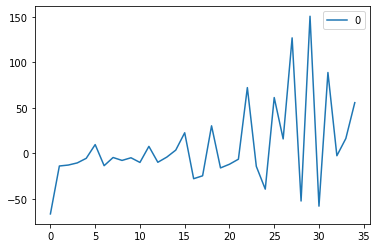

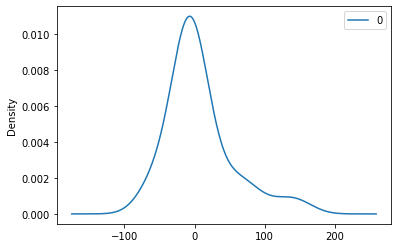

                0
count   35.000000
mean     6.978316
std     46.679332
min    -66.442740
25%    -13.692908
50%     -5.449956
75%     16.080602
max    150.463613
Root Mean Square Error for MA Model:  1910.1763922927767


In [68]:
model_arima = ARIMA(trainActiveCases, order=(1, 1, 1))  
model_arima_fit = model_arima.fit()  


prediction_arima=model_arima_fit.forecast(len(validActiveCases))[0]
valid_ml["ARIMA Model Prediction"]=list(np.exp(prediction_arima))

print(model_arima_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_arima_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

model_scores.append(np.sqrt(mean_squared_error(validActiveCases,prediction_arima)))
print("Root Mean Square Error for MA Model: ",np.sqrt(mean_squared_error(validActiveCases,prediction_arima)))

Text(0.5, 1.0, 'Active Cases ARIMA Model Forecasting for state Maharashtra')

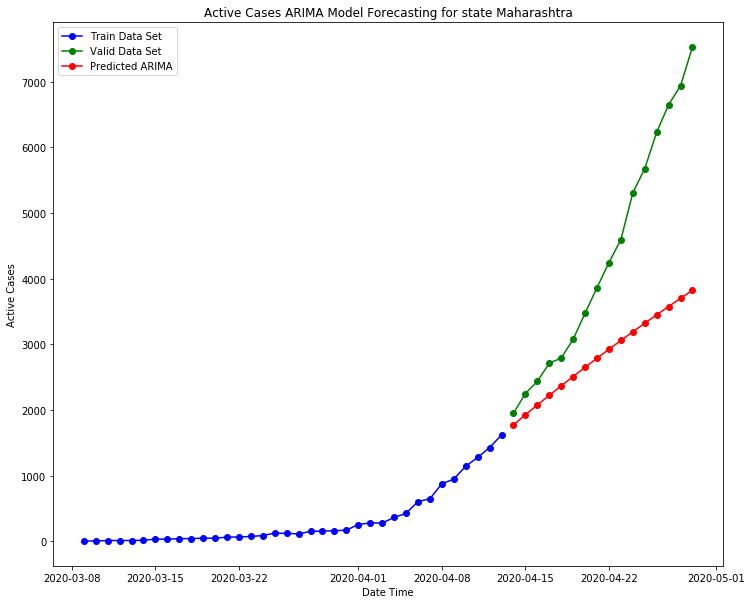

In [69]:
index= pd.date_range(start=train_dates[0], periods=len(train_dates), freq='D')
valid_index = pd.date_range(start=valid_dates[0], periods=len(valid_dates), freq='D')

train_active =  pd.Series(train_ml['Active Cases'].values, index)
valid_active =  pd.Series(valid_ml['Active Cases'].values, valid_index)
pred_active =  pd.Series(prediction_arima, valid_index)

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, marker='o',color='blue',label ="Train Data Set")
plt.plot(valid_active, marker='o',color='green',label ="Valid Data Set")
plt.plot(pred_active, marker='o',color='red',label ="Predicted ARIMA")

plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Active Cases')
plt.title("Active Cases ARIMA Model Forecasting for state " + stateName)

# SARIMAX Model

In [70]:
df_per_State_features = df_state_recs[9]

train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -170.181
Date:                Sun, 28 Jun 2020   AIC                            346.361
Time:                        18:27:04   BIC                            350.851
Sample:                             0   HQIC                           347.872
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1400      0.019     60.733      0.000       1.103       1.177
ma.L1         -1.0000      0.201     -4.985      0.000      -1.393      -0.607
sigma2      1618.7269      0.000   1.31e+07      0.0

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning:

overflow encountered in exp

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



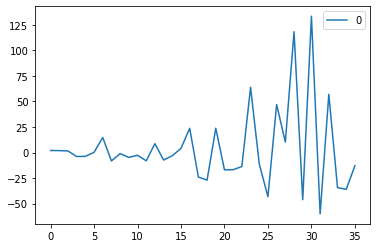

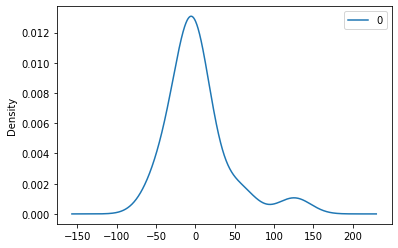

                0
count   36.000000
mean     3.471081
std     39.659738
min    -60.049505
25%    -14.475658
50%     -3.462315
75%      9.039938
max    133.322283
(16, 1)


In [71]:
model_sarima = sm.tsa.statespace.SARIMAX(trainActiveCases, order=(1, 1, 1), seasonal_order=(0,0,0,12),
                                 enforce_stationarity=False, enforce_invertibility=False)
model_sarima_fit = model_sarima.fit()  


prediction_sarima=model_sarima_fit.forecast(np.shape(validActiveCases)[0])
valid_ml["SARIMA Model Prediction"]=list(np.exp(prediction_sarima))

print(model_sarima_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_sarima_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

print(np.shape(validActiveCases))

In [72]:
print(np.shape(prediction_sarima[1:]))
print(np.shape(validActiveCases))
#model_scores.append(np.sqrt(mean_squared_error(validActiveCases,prediction_sarima)))
print("Root Mean Square Error for SARIMA Model: ",np.sqrt(mean_squared_error(validActiveCases,prediction_sarima)))

(15,)
(16, 1)
Root Mean Square Error for SARIMA Model:  2428.2152581669725


Text(0.5, 1.0, 'Active Cases SARIMA Model Forecasting for state Maharashtra')

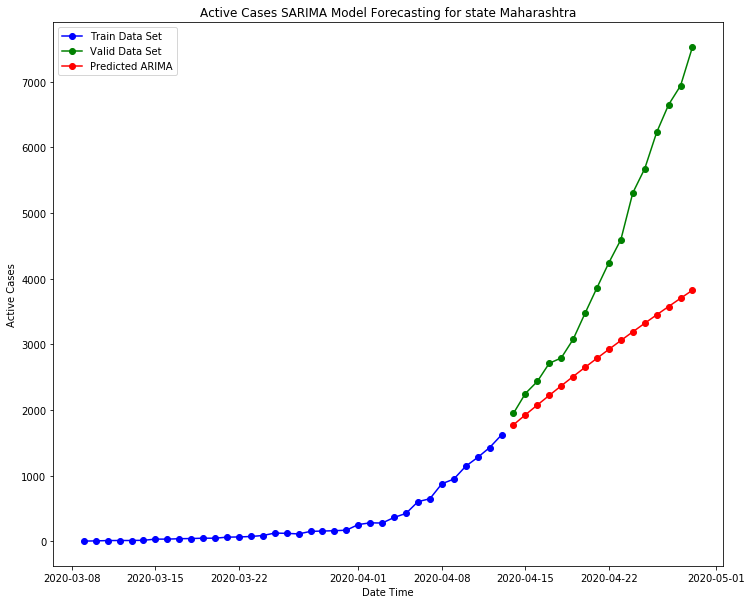

In [73]:
index= pd.date_range(start=train_dates[0], periods=len(train_dates), freq='D')
valid_index = pd.date_range(start=valid_dates[0], periods=len(valid_dates), freq='D')

train_active =  pd.Series(train_ml['Active Cases'].values, index)
valid_active =  pd.Series(valid_ml['Active Cases'].values, valid_index)
pred_active =  pd.Series(prediction_arima, valid_index)

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, marker='o',color='blue',label ="Train Data Set")
plt.plot(valid_active, marker='o',color='green',label ="Valid Data Set")
plt.plot(pred_active, marker='o',color='red',label ="Predicted ARIMA")

plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Active Cases')
plt.title("Active Cases SARIMA Model Forecasting for state " + stateName)

# Auto-ARIMA models - AR, MA, ARIMA and SARIMA

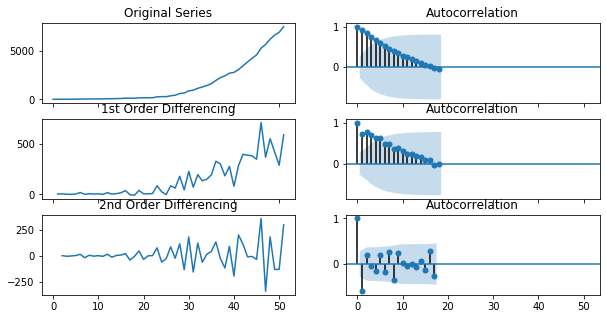

In [117]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(10,5))
axes[0, 0].plot(df_per_State_features['Active Cases']); axes[0, 0].set_title('Original Series')
plot_acf(df_per_State_features['Active Cases'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_per_State_features['Active Cases'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_per_State_features['Active Cases'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_per_State_features['Active Cases'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_per_State_features['Active Cases'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

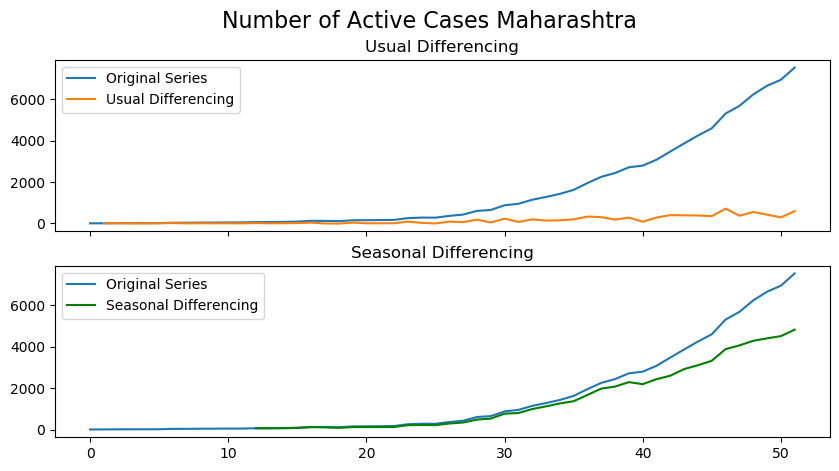

In [114]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df_per_State_features['Active Cases'], label='Original Series')
axes[0].plot(df_per_State_features['Active Cases'].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(df_per_State_features['Active Cases'], label='Original Series')
axes[1].plot(df_per_State_features['Active Cases'].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Number of Active Cases Maharashtra', fontsize=16)
plt.show()

# Auto-ARIMA AR model

In [74]:
df_per_State_features = df_state_recs[9]

train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values


Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=382.622, BIC=385.675, Time=0.009 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=348.099, BIC=352.678, Time=0.030 seconds
Fit ARIMA(2,2,0)x(0,0,0,0) [intercept=True]; AIC=346.956, BIC=353.062, Time=0.042 seconds
Fit ARIMA(3,2,0)x(0,0,0,0) [intercept=True]; AIC=348.523, BIC=356.155, Time=0.057 seconds
Fit ARIMA(4,2,0)x(0,0,0,0) [intercept=True]; AIC=349.819, BIC=358.977, Time=0.056 seconds
Fit ARIMA(5,2,0)x(0,0,0,0) [intercept=True]; AIC=343.057, BIC=353.742, Time=0.104 seconds
Total fit time: 0.302 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(5, 2, 0)   Log Likelihood                -164.529
Date:                Sun, 28 Jun 2020   AIC                            343.057
Time:                        18:37:09   BIC                            353.742
Sample:                            

<Figure size 720x720 with 0 Axes>

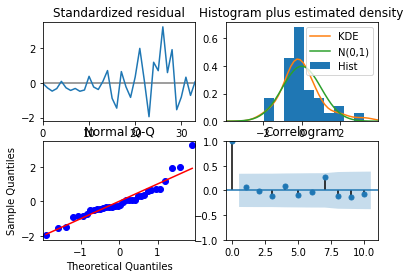

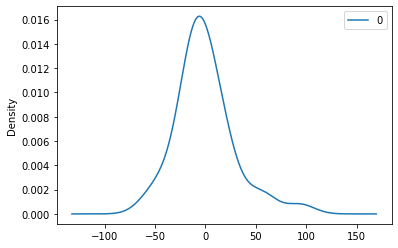

In [76]:
model_ar= auto_arima(trainActiveCases,trace=True, error_action='ignore', start_p=0,start_q=0,max_p=5,max_q=0,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ar_fit = model_ar.fit(trainActiveCases)
prediction_ar=model_ar_fit.predict(len(validActiveCases))

print(model_ar_fit.summary())
plt.figure(figsize=(10,10))
# plot residual errors
residuals = pd.DataFrame(model_ar_fit.resid())
model_ar_fit.plot_diagnostics()
plt.show()
residuals.plot(kind='kde')
plt.show()

In [77]:
model_scores.append(np.sqrt(mean_squared_error(validActiveCases,prediction_ar)))
print("Root Mean Square Error for Auto ARIMA AR Model: ",np.sqrt(mean_squared_error(validActiveCases,prediction_ar)))

Root Mean Square Error for Auto ARIMA AR Model:  1416.7115158738695


Text(0.5, 1.0, 'Active Cases Auto AR (ARIMA) Model Forecasting for state Maharashtra')

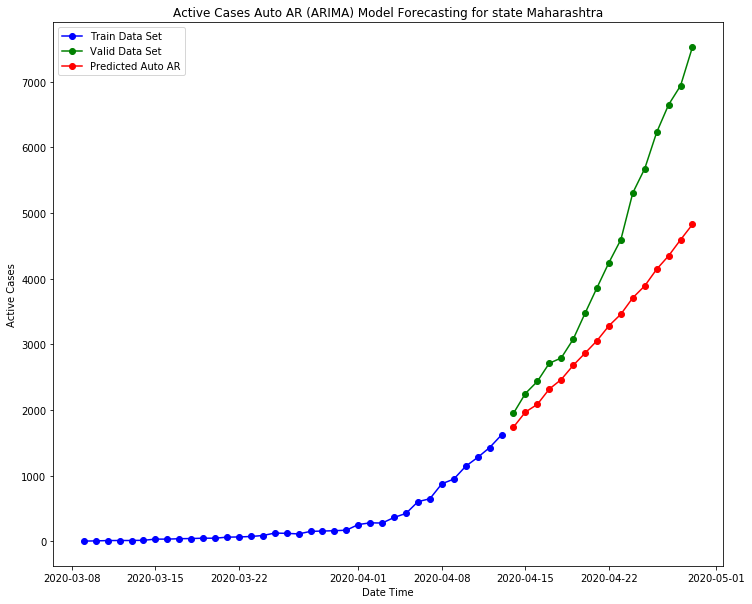

In [78]:
index= pd.date_range(start=train_dates[0], periods=len(train_dates), freq='D')
valid_index = pd.date_range(start=valid_dates[0], periods=len(valid_dates), freq='D')

train_active =  pd.Series(train_ml['Active Cases'].values, index)
valid_active =  pd.Series(valid_ml['Active Cases'].values, valid_index)
pred_active =  pd.Series(prediction_ar, valid_index)

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, marker='o',color='blue',label ="Train Data Set")
plt.plot(valid_active, marker='o',color='green',label ="Valid Data Set")
plt.plot(pred_active, marker='o',color='red',label ="Predicted Auto AR")

plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Active Cases')
plt.title("Active Cases Auto AR (ARIMA) Model Forecasting for state " + stateName)

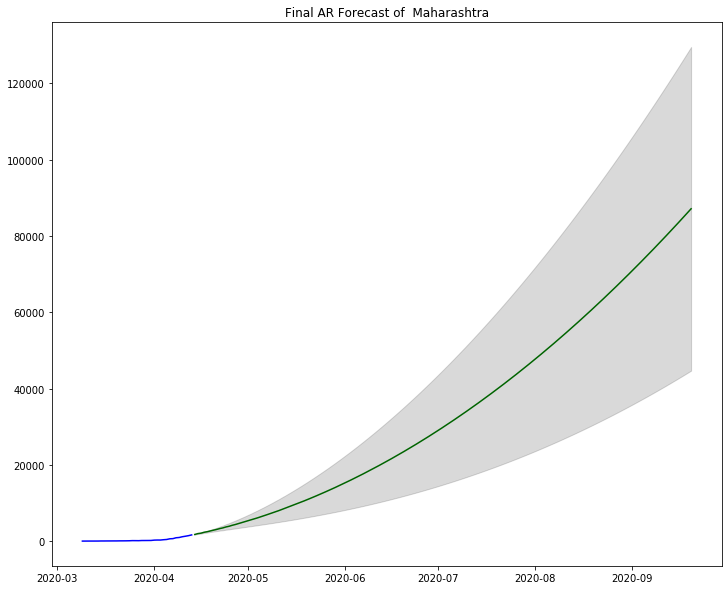

In [79]:
# Forecast over 4-5 months
n_periods = 160
fc, confint = model_ar_fit.predict(n_periods=n_periods, return_conf_int=True)
valid_index = pd.date_range(start=valid_dates[0], periods=n_periods, freq='D')


train_active =  pd.Series(train_ml['Active Cases'].values, index)

# make series for plotting purpose
fc_series = pd.Series(fc, index=valid_index)

lower_series = pd.Series(confint[:, 0], index=valid_index)
upper_series = pd.Series(confint[:, 1], index=valid_index)

# Plot
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, color='blue')
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final AR Forecast of  Maharashtra")
plt.show()

# Auto-ARIMA MA model

In [79]:
df_per_State_features = df_state_recs[9]

train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values


Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=382.622, BIC=385.675, Time=0.013 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=359.364, BIC=363.944, Time=0.044 seconds
Fit ARIMA(0,2,2)x(0,0,0,0) [intercept=True]; AIC=348.307, BIC=354.413, Time=0.065 seconds
Fit ARIMA(0,2,3)x(0,0,0,0) [intercept=True]; AIC=349.400, BIC=357.032, Time=0.073 seconds
Fit ARIMA(0,2,4)x(0,0,0,0) [intercept=True]; AIC=349.188, BIC=358.346, Time=0.106 seconds
Fit ARIMA(0,2,5)x(0,0,0,0) [intercept=True]; AIC=345.237, BIC=355.921, Time=0.157 seconds
Total fit time: 0.466 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(0, 2, 5)   Log Likelihood                -165.618
Date:                Sun, 28 Jun 2020   AIC                            345.237
Time:                        19:05:31   BIC                            355.921
Sample:                            

<Figure size 720x720 with 0 Axes>

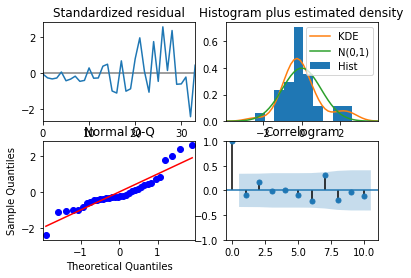

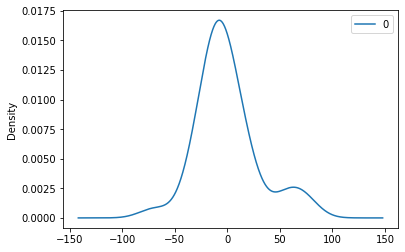

In [80]:
model_ma= auto_arima(trainActiveCases,trace=True, error_action='ignore', start_p=0,start_q=0,max_p=0,max_q=5,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ma_fit = model_ma.fit(trainActiveCases)
prediction_ma=model_ma_fit.predict(len(validActiveCases))

print(model_ma_fit.summary())
plt.figure(figsize=(10,10))
# plot residual errors
residuals = pd.DataFrame(model_ma_fit.resid())
model_ma_fit.plot_diagnostics()
plt.show()
residuals.plot(kind='kde')
plt.show()

In [81]:
model_scores.append(np.sqrt(mean_squared_error(validActiveCases,prediction_ma)))
print("Root Mean Square Error for Auto ARIMA MA Model: ",np.sqrt(mean_squared_error(validActiveCases,prediction_ma)))

Root Mean Square Error for Auto ARIMA MA Model:  1637.7185809212592


Text(0.5, 1.0, 'Active Cases Auto MA (ARIMA) Model Forecasting for state Maharashtra')

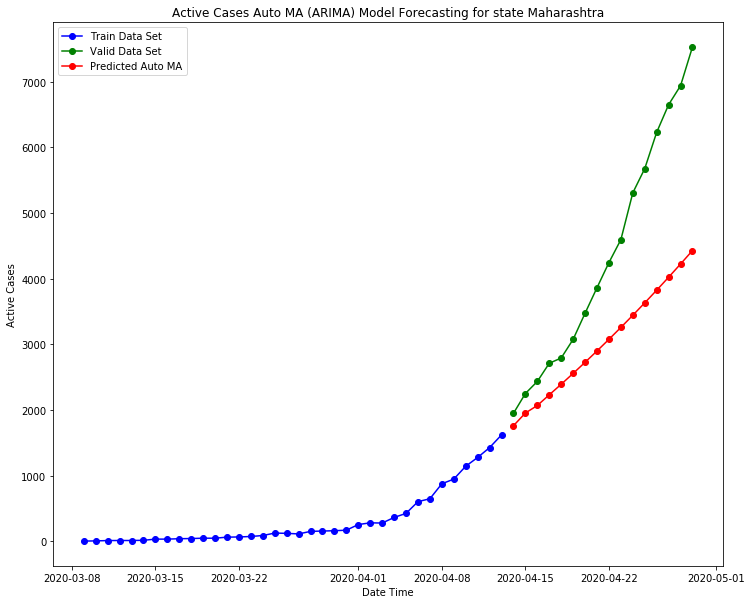

In [82]:
index= pd.date_range(start=train_dates[0], periods=len(train_dates), freq='D')
valid_index = pd.date_range(start=valid_dates[0], periods=len(valid_dates), freq='D')

train_active =  pd.Series(train_ml['Active Cases'].values, index)
valid_active =  pd.Series(valid_ml['Active Cases'].values, valid_index)
pred_active =  pd.Series(prediction_ma, valid_index)

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, marker='o',color='blue',label ="Train Data Set")
plt.plot(valid_active, marker='o',color='green',label ="Valid Data Set")
plt.plot(pred_active, marker='o',color='red',label ="Predicted Auto MA")

plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Active Cases')
plt.title("Active Cases Auto MA (ARIMA) Model Forecasting for state " + stateName)

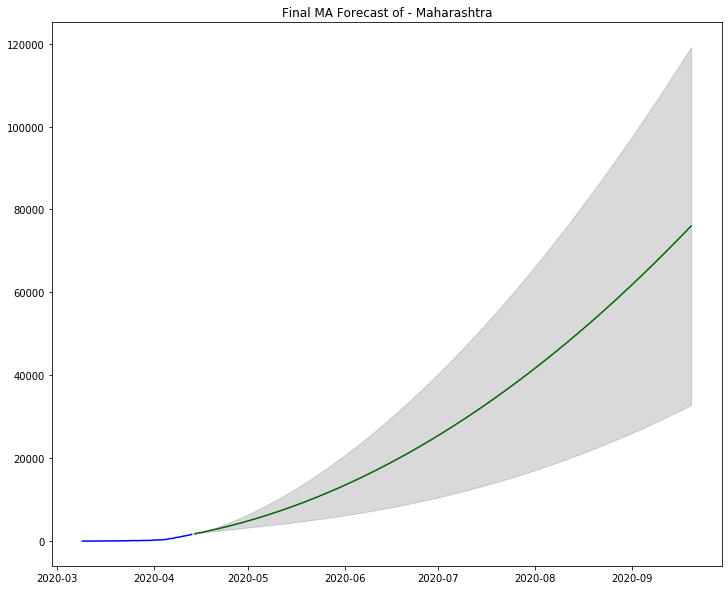

In [83]:
# Forecast over 4-5 months
n_periods = 160
fc, confint = model_ma_fit.predict(n_periods=n_periods, return_conf_int=True)
valid_index = pd.date_range(start=valid_dates[0], periods=n_periods, freq='D')


train_active =  pd.Series(train_ml['Active Cases'].values, index)

# make series for plotting purpose
fc_series = pd.Series(fc, index=valid_index)

lower_series = pd.Series(confint[:, 0], index=valid_index)
upper_series = pd.Series(confint[:, 1], index=valid_index)

# Plot
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, color='blue')
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final MA Forecast of - Maharashtra")
plt.show()

# Auto ARIMA Model

In [85]:
df_per_State_features = df_state_recs[9]

train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values


Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=382.622, BIC=385.675, Time=0.015 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=359.364, BIC=363.944, Time=0.104 seconds
Fit ARIMA(0,2,2)x(0,0,0,0) [intercept=True]; AIC=348.307, BIC=354.413, Time=0.231 seconds
Fit ARIMA(0,2,3)x(0,0,0,0) [intercept=True]; AIC=349.400, BIC=357.032, Time=0.227 seconds
Fit ARIMA(0,2,4)x(0,0,0,0) [intercept=True]; AIC=349.188, BIC=358.346, Time=0.301 seconds
Fit ARIMA(0,2,5)x(0,0,0,0) [intercept=True]; AIC=345.237, BIC=355.921, Time=0.357 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=348.099, BIC=352.678, Time=0.076 seconds
Fit ARIMA(1,2,1)x(0,0,0,0) [intercept=True]; AIC=346.637, BIC=352.743, Time=0.106 seconds
Fit ARIMA(1,2,2)x(0,0,0,0) [intercept=True]; AIC=348.296, BIC=355.928, Time=0.201 seconds
Fit ARIMA(1,2,3)x(0,0,0,0) [intercept=True]; AIC=349.574, BIC=358.732, Time=0.199 seconds
Fit ARIMA(1,2,4)x(0,0,0,0) [intercept=True]; AIC=343.251, BIC=353.936, Time=0.380 seconds
Fit ARIMA(

<Figure size 720x720 with 0 Axes>

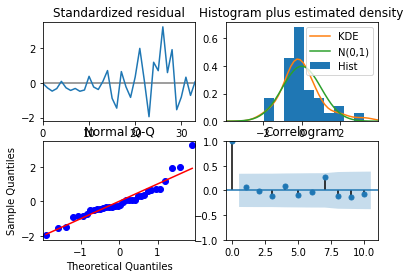

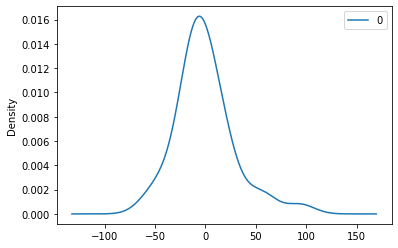

In [86]:
model_arima= auto_arima(trainActiveCases,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=5,max_q=5,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima_fit = model_arima.fit(trainActiveCases)
prediction_arima=model_arima_fit.predict(len(validActiveCases))

print(model_arima_fit.summary())
plt.figure(figsize=(10,10))
# plot residual errors
residuals = pd.DataFrame(model_arima_fit.resid())
model_arima_fit.plot_diagnostics()
plt.show()
residuals.plot(kind='kde')
plt.show()

In [87]:
model_scores.append(np.sqrt(mean_squared_error(validActiveCases,prediction_arima)))
print("Root Mean Square Error for Auto ARIMA Model: ",np.sqrt(mean_squared_error(validActiveCases,prediction_arima)))

Root Mean Square Error for Auto ARIMA Model:  1416.7114296446698


Text(0.5, 1.0, 'Active Cases Auto ARIMA Model Forecasting for state Maharashtra')

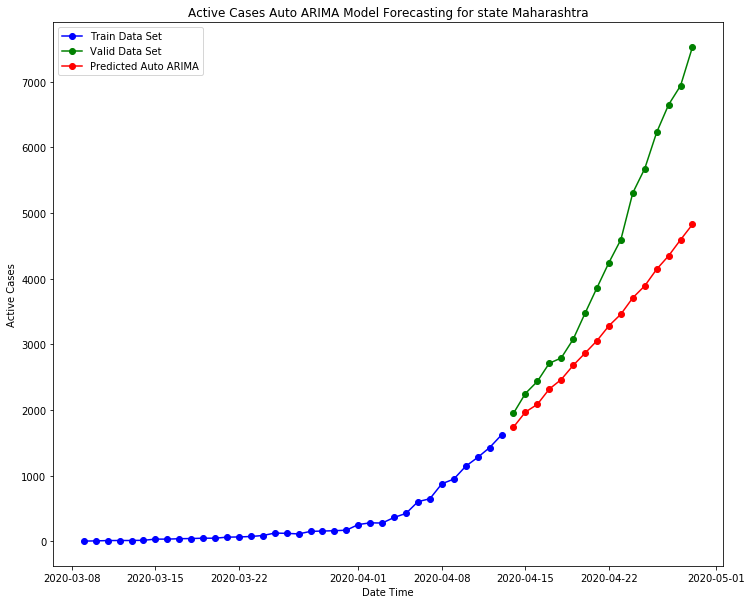

In [88]:
index= pd.date_range(start=train_dates[0], periods=len(train_dates), freq='D')
valid_index = pd.date_range(start=valid_dates[0], periods=len(valid_dates), freq='D')

train_active =  pd.Series(train_ml['Active Cases'].values, index)
valid_active =  pd.Series(valid_ml['Active Cases'].values, valid_index)
pred_active =   pd.Series(prediction_arima, valid_index)

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, marker='o',color='blue',label ="Train Data Set")
plt.plot(valid_active, marker='o',color='green',label ="Valid Data Set")
plt.plot(pred_active, marker='o',color='red',label ="Predicted Auto ARIMA")

plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Active Cases')
plt.title("Active Cases Auto ARIMA Model Forecasting for state " + stateName)

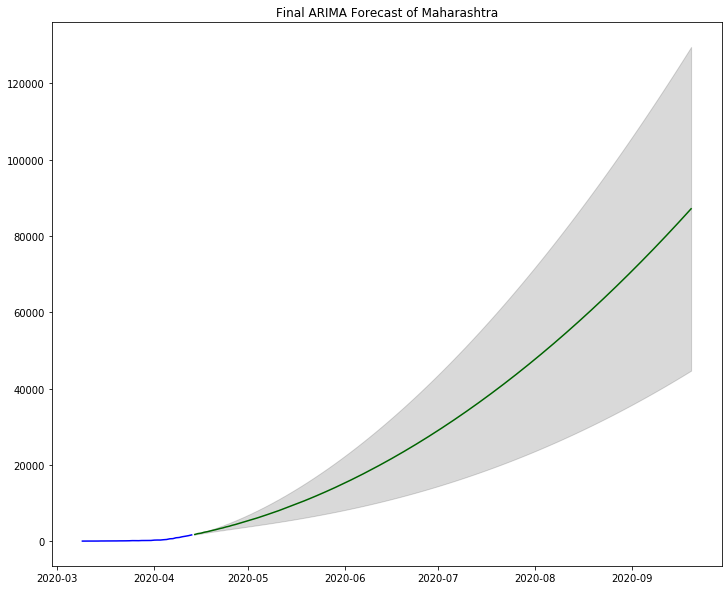

In [89]:
# Forecast over 4-5 months
n_periods = 160
fc, confint = model_arima_fit.predict(n_periods=n_periods, return_conf_int=True)
valid_index = pd.date_range(start=valid_dates[0], periods=n_periods, freq='D')


train_active =  pd.Series(train_ml['Active Cases'].values, index)

# make series for plotting purpose
fc_series = pd.Series(fc, index=valid_index)

lower_series = pd.Series(confint[:, 0], index=valid_index)
upper_series = pd.Series(confint[:, 1], index=valid_index)

# Plot
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, color='blue')
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final ARIMA Forecast of Maharashtra")
plt.show()

# Auto SARIMA Model

In [84]:
df_per_State_features = df_state_recs[9]

train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values

Performing stepwise search to minimize aic
Fit ARIMA(0,2,0)x(1,0,1,12) [intercept=True]; AIC=386.467, BIC=392.573, Time=0.182 seconds
Fit ARIMA(0,2,0)x(0,0,0,12) [intercept=True]; AIC=382.622, BIC=385.675, Time=0.005 seconds
Fit ARIMA(1,2,0)x(1,0,0,12) [intercept=True]; AIC=350.089, BIC=356.195, Time=0.062 seconds
Fit ARIMA(0,2,1)x(0,0,1,12) [intercept=True]; AIC=361.239, BIC=367.345, Time=0.073 seconds
Fit ARIMA(0,2,0)x(0,0,0,12) [intercept=False]; AIC=380.885, BIC=382.412, Time=0.005 seconds
Fit ARIMA(1,2,0)x(0,0,0,12) [intercept=True]; AIC=348.099, BIC=352.678, Time=0.021 seconds
Fit ARIMA(1,2,0)x(0,0,1,12) [intercept=True]; AIC=350.089, BIC=356.194, Time=0.039 seconds
Fit ARIMA(1,2,0)x(1,0,1,12) [intercept=True]; AIC=352.063, BIC=359.695, Time=0.196 seconds
Near non-invertible roots for order (1, 2, 0)(1, 0, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(2,2,0)x(0,0,0,12) [intercept=True]; AIC=346.956, BIC=353.06

<Figure size 720x720 with 0 Axes>

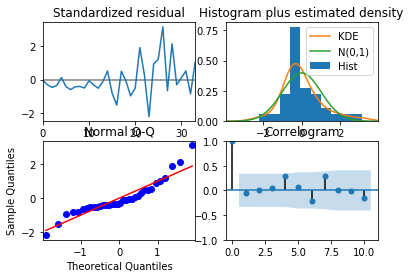

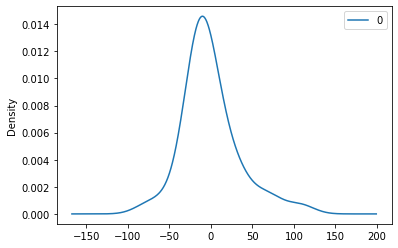

In [91]:
model_sarima= auto_arima(trainActiveCases,trace=True, error_action='ignore', 
                         start_p=0,start_q=0,max_p=5,max_q=5,m=12,
                   suppress_warnings=True,stepwise=True,seasonal=True)
model_sarima_fit = model_sarima.fit(trainActiveCases)
prediction_sarima=model_sarima_fit.predict(len(validActiveCases))

print(model_sarima_fit.summary())
plt.figure(figsize=(10,10))
# plot residual errors
residuals = pd.DataFrame(model_sarima_fit.resid())
model_sarima_fit.plot_diagnostics()
plt.show()
residuals.plot(kind='kde')
plt.show()

In [89]:
model_scores.append(np.sqrt(mean_squared_error(validActiveCases,prediction_sarima)))
print("Root Mean Square Error for Auto SARIMA Model: ",np.sqrt(mean_squared_error(validActiveCases,prediction_sarima)))

Root Mean Square Error for Auto SARIMA Model:  1309.1550967331734


Text(0.5, 1.0, 'Active Cases Auto SARIMA Model Forecasting for state Maharashtra')

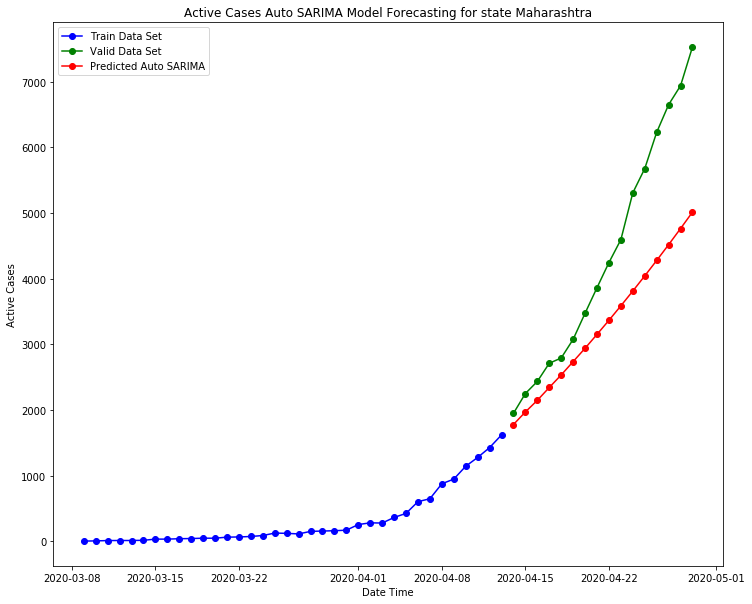

In [90]:
index= pd.date_range(start=train_dates[0], periods=len(train_dates), freq='D')
valid_index = pd.date_range(start=valid_dates[0], periods=len(valid_dates), freq='D')

train_active =  pd.Series(train_ml['Active Cases'].values, index)
valid_active =  pd.Series(valid_ml['Active Cases'].values, valid_index)
pred_active =   pd.Series(prediction_sarima, valid_index)

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, marker='o',color='blue',label ="Train Data Set")
plt.plot(valid_active, marker='o',color='green',label ="Valid Data Set")
plt.plot(pred_active, marker='o',color='red',label ="Predicted Auto SARIMA")

plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Active Cases')
plt.title("Active Cases Auto SARIMA Model Forecasting for state " + stateName)

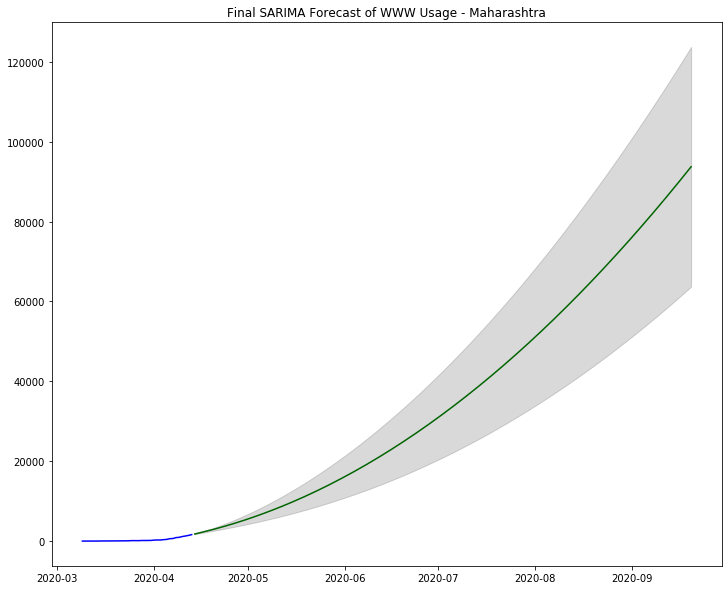

In [94]:
# Forecast over 4-5 months
n_periods = 160
fc, confint = model_sarima_fit.predict(n_periods=n_periods, return_conf_int=True)
valid_index = pd.date_range(start=valid_dates[0], periods=n_periods, freq='D')


train_active =  pd.Series(train_ml['Active Cases'].values, index)

# make series for plotting purpose
fc_series = pd.Series(fc, index=valid_index)

lower_series = pd.Series(confint[:, 0], index=valid_index)
upper_series = pd.Series(confint[:, 1], index=valid_index)

# Plot
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, color='blue')
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final SARIMA Forecast - Maharashtra")
plt.show()

In [95]:
df_per_State_features.head(2)

,Unnamed: 0,index,Date,Name of State / UT,Cured/Discharged/Migrated,Death,Total Confirmed cases,Active Cases,LiteracyRate,PopulationDensity,...,StateHospitalBeds,StateHospitalICUs,StateHospitalVentilators,Rate_per_3_days,Rate_per_5_days,Rate_per_7_days,Rate_per_15_days,Rate_per_21_days,is_curve_flattened,Days Since
0,0,76,2020-03-09,Maharashtra,0,0,2,2,82.3,365,...,231739,11587,5793,0.0,0.0,0.0,0.0,0.0,0,0
1,1,88,2020-03-10,Maharashtra,0,0,5,5,82.3,365,...,231739,11587,5793,0.0,0.0,0.0,0.0,0.0,0,1


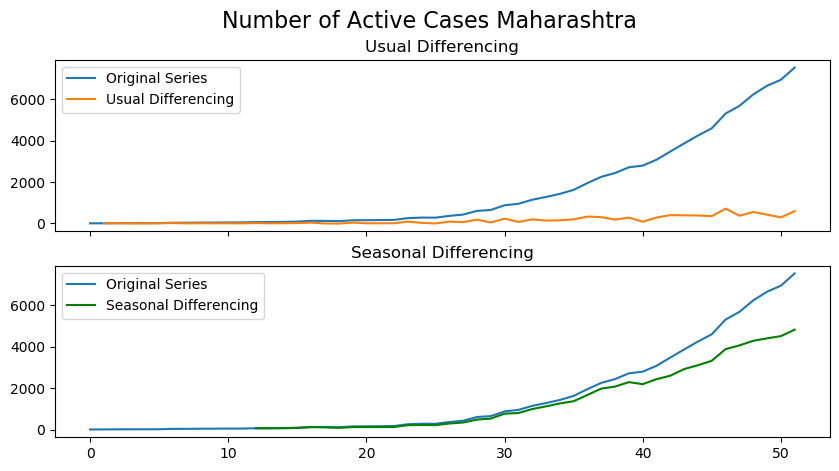

In [97]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df_per_State_features['Active Cases'], label='Original Series')
axes[0].plot(df_per_State_features['Active Cases'].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(df_per_State_features['Active Cases'], label='Original Series')
axes[1].plot(df_per_State_features['Active Cases'].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Number of Active Cases Maharashtra', fontsize=16)
plt.show()

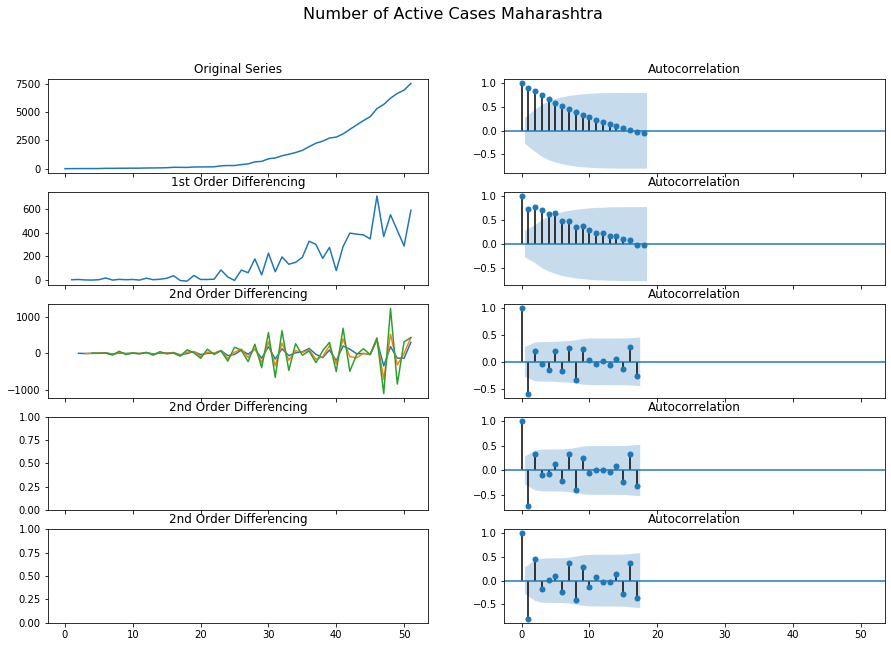

In [102]:
# Original Series
fig, axes = plt.subplots(5, 2, sharex=True, figsize=(15,10))
axes[0, 0].plot(df_per_State_features['Active Cases']); axes[0, 0].set_title('Original Series')
plot_acf(df_per_State_features['Active Cases'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_per_State_features['Active Cases'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_per_State_features['Active Cases'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_per_State_features['Active Cases'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_per_State_features['Active Cases'].diff().diff().dropna(), ax=axes[2, 1])
plt.suptitle('Number of Active Cases Maharashtra', fontsize=16)

# 3rd Differencing
axes[2, 0].plot(df_per_State_features['Active Cases'].diff().diff().diff()); axes[3, 0].set_title('2nd Order Differencing')
plot_acf(df_per_State_features['Active Cases'].diff().diff().diff().dropna(), ax=axes[3, 1])
plt.suptitle('Number of Active Cases Maharashtra', fontsize=16)


# 4th Differencing
axes[2, 0].plot(df_per_State_features['Active Cases'].diff().diff().diff().diff()); axes[4, 0].set_title('2nd Order Differencing')
plot_acf(df_per_State_features['Active Cases'].diff().diff().diff().diff().dropna(), ax=axes[4, 1])
plt.suptitle('Number of Active Cases Maharashtra', fontsize=16)

plt.show()

# Prophet Model from Facebook

In [89]:
df_per_State_features = df_state_recs[9]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values

df_per_State_features['Date'] = pd.to_datetime(df_per_State_features['Date'])

In [90]:
prophet_a=Prophet(interval_width=0.95,weekly_seasonality=True)
prophet_active=pd.DataFrame(zip(list(df_per_State_features['Date']),list(df_per_State_features['Active Cases'])),columns=['ds','y'])

prophet_a.fit(prophet_active)
future_active = prophet_a.make_future_dataframe(periods=365)
future_active.tail()

forecast_active = prophet_a.predict(future_active)
forecast_active[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



,ds,yhat,yhat_lower,yhat_upper
412,2021-04-25,160549.326301,34082.969956,284471.009482
413,2021-04-26,160977.898079,34076.751249,285752.682135
414,2021-04-27,161386.516704,33916.993036,286842.486068
415,2021-04-28,161859.460046,33852.028532,288005.112554
416,2021-04-29,162239.229759,33455.127578,289036.441851


In [91]:
prophet_active_forecast=forecast_active.copy()

In [92]:
active_cases_forecast=prophet_a.predict(future_active)

In [93]:
model_scores.append(np.sqrt(mean_squared_error(totActiveCases,forecast_active['yhat'].head(df_per_State_features.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(totActiveCases,forecast_active['yhat'].head(df_per_State_features.shape[0]))))

Root Mean Squared Error for Prophet Model:  70.122739112006


Figure(720x432)


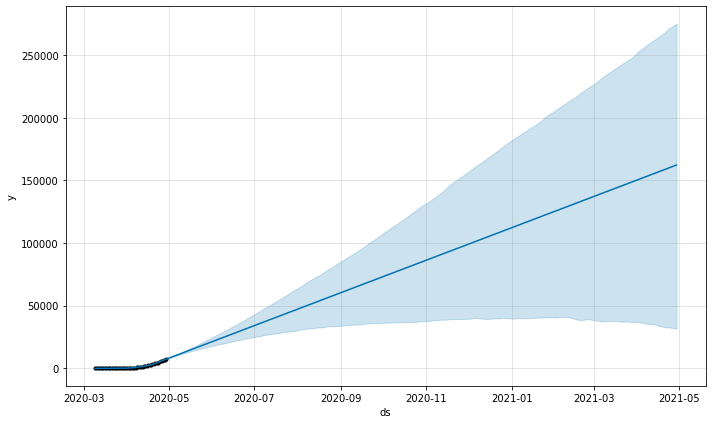

In [94]:
print(prophet_a.plot(active_cases_forecast))

Figure(648x432)


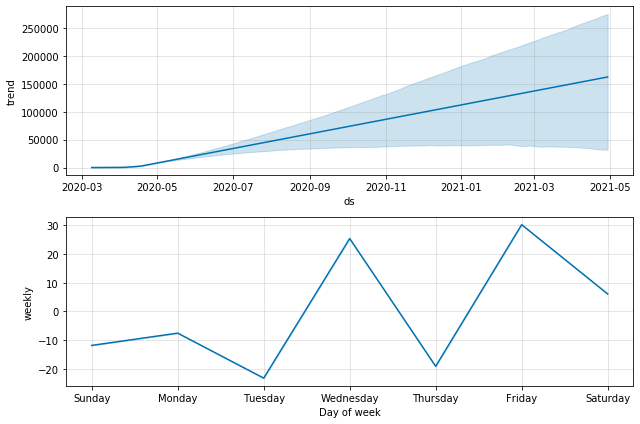

In [95]:
print(prophet_a.plot_components(active_cases_forecast))

# VARMAX models

In [96]:
df_per_State_features = df_state_recs[9]

train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values


In [97]:
df_per_State_features.index = df_per_State_features.Date
print(train_ml.columns)

Index(['Unnamed: 0', 'index', 'Date', 'Name of State / UT',
       'Cured/Discharged/Migrated', 'Death', 'Total Confirmed cases',
       'Active Cases', 'LiteracyRate', 'PopulationDensity', 'ElderlyRate',
       'DistrictsEffected', 'NoRedZones', 'NoOrangeZones', 'NoGreenZones',
       'InternationalAirports', 'IntAirportPassenger', 'StateHospitals',
       'StateHospitalBeds', 'StateHospitalICUs', 'StateHospitalVentilators',
       'Rate_per_3_days', 'Rate_per_5_days', 'Rate_per_7_days',
       'Rate_per_15_days', 'Rate_per_21_days', 'is_curve_flattened',
       'Days Since'],
      dtype='object')


In [98]:
train_var_ml = train_ml[['Cured/Discharged/Migrated','Death', 'Active Cases']]
valid_var_ml = valid_ml[['Cured/Discharged/Migrated','Death', 'Active Cases', 'Total Confirmed cases']]

# AR (Auto Regressive) model of VARMA

In [99]:
mod = sm.tsa.VARMAX(endog=train_var_ml, order=(2,0), trend='n')#exog=exog
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:374: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                                             Statespace Model Results                                             
Dep. Variable:     ['Cured/Discharged/Migrated', 'Death', 'Active Cases']   No. Observations:                   36
Model:                                                             VAR(2)   Log Likelihood                -392.727
Date:                                                    Sat, 23 May 2020   AIC                            833.455
Time:                                                            18:00:10   BIC                            871.459
Sample:                                                                 0   HQIC                           846.719
                                                                     - 36                                         
Covariance Type:                                                      opg                                         
Ljung-Box (Q):          12.02, 25.79, 40.28   Jarque-Bera (JB):    9.39, 42.99, 

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Text(0.5, 1.0, 'VARMAX (Vector Autoregressive Model with Exogenous Variables) based AR Forecasting for state Maharashtra')

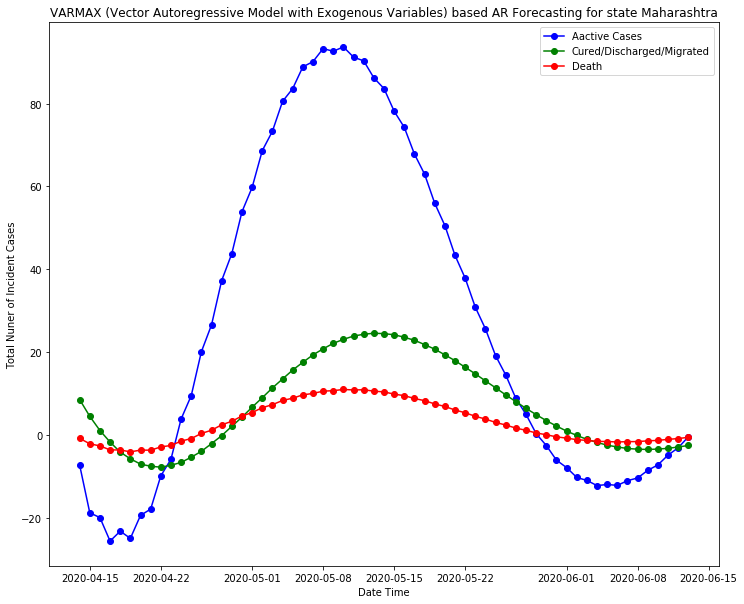

In [100]:
valid_index = pd.date_range(start=valid_dates[0], periods=61, freq='D')
pred = res.impulse_responses(60, orthogonalized=True)

a_vr_Series = pd.Series(pred['Active Cases'].values, index=valid_index)
c_vr_Series = pd.Series(pred['Cured/Discharged/Migrated'].values, index=valid_index)
d_vr_Series = pd.Series(pred['Death'].values, index=valid_index)

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(a_vr_Series, marker='o',color='blue',label ="Aactive Cases")
plt.plot(c_vr_Series, marker='o',color='green',label ="Cured/Discharged/Migrated")
plt.plot(d_vr_Series, marker='o',color='red',label ="Death")

plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Total Nuner of Incident Cases')
plt.title("VARMAX (Vector Autoregressive Model with Exogenous Variables) based AR Forecasting for state " + stateName)

# VMA  Model (Vector Moving Average Model)

In [101]:
train_var_ml = train_ml[['Cured/Discharged/Migrated','Death', 'Active Cases']]
valid_var_ml = valid_ml[['Cured/Discharged/Migrated','Death', 'Active Cases']]

In [102]:
mod = sm.tsa.VARMAX(endog=train_var_ml, order=(0,2),  trend='n', error_cov_type='diagonal')
res = mod.fit(maxiter=100, disp=False)
print(res.summary())

                                             Statespace Model Results                                             
Dep. Variable:     ['Cured/Discharged/Migrated', 'Death', 'Active Cases']   No. Observations:                   36
Model:                                                             VMA(2)   Log Likelihood                -512.464
Date:                                                    Sat, 23 May 2020   AIC                           1066.927
Time:                                                            18:00:11   BIC                           1100.181
Sample:                                                                 0   HQIC                          1078.534
                                                                     - 36                                         
Covariance Type:                                                      opg                                         
Ljung-Box (Q):          60.98, 59.34, 129.26   Jarque-Bera (JB):    0.60, 30.36,

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Text(0.5, 1.0, 'VARMAX (Vector Autoregressive Model with Exogenous Variables) based MA Forecasting for state Maharashtra')

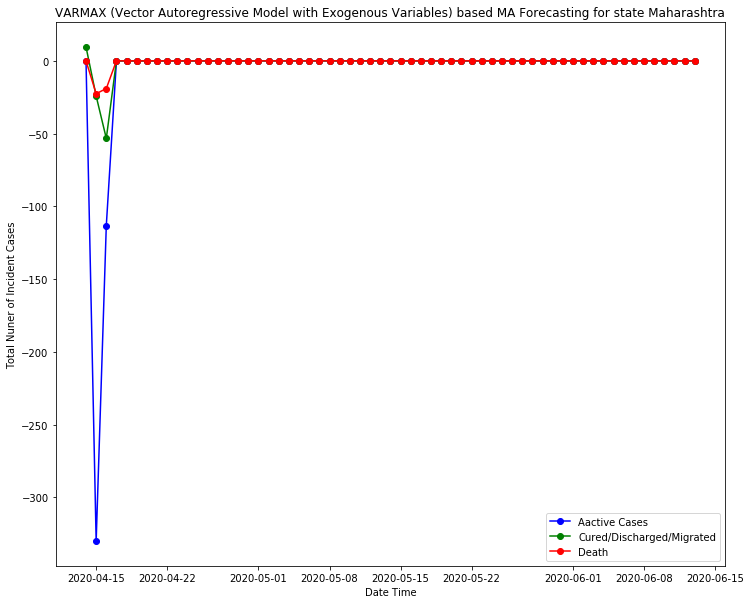

In [103]:
valid_index = pd.date_range(start=valid_dates[0], periods=61, freq='D')
pred = res.impulse_responses(60, orthogonalized=True)

a_vr_Series = pd.Series(pred['Active Cases'].values, index=valid_index)
c_vr_Series = pd.Series(pred['Cured/Discharged/Migrated'].values, index=valid_index)
d_vr_Series = pd.Series(pred['Death'].values, index=valid_index)

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(a_vr_Series, marker='o',color='blue',label ="Aactive Cases")
plt.plot(c_vr_Series, marker='o',color='green',label ="Cured/Discharged/Migrated")
plt.plot(d_vr_Series, marker='o',color='red',label ="Death")

plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Total Nuner of Incident Cases')
plt.title("VARMAX (Vector Autoregressive Model with Exogenous Variables) based MA Forecasting for state " + stateName)

# VARMA ARIMA (Vector Auto Regressive Moving Average Model ) model

In [104]:
train_var_ml = train_ml[['Cured/Discharged/Migrated','Death', 'Active Cases']]
valid_var_ml = valid_ml[['Cured/Discharged/Migrated','Death', 'Active Cases']]

In [105]:
mod = sm.tsa.VARMAX(endog=train_var_ml, order=(2,2),  trend='n', error_cov_type='diagonal')
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.



                                             Statespace Model Results                                             
Dep. Variable:     ['Cured/Discharged/Migrated', 'Death', 'Active Cases']   No. Observations:                   36
Model:                                                         VARMA(2,2)   Log Likelihood                -399.290
Date:                                                    Sat, 23 May 2020   AIC                            876.581
Time:                                                            18:00:20   BIC                            938.338
Sample:                                                                 0   HQIC                           898.136
                                                                     - 36                                         
Covariance Type:                                                      opg                                         
Ljung-Box (Q):             16.33, 5.85, 31.03   Jarque-Bera (JB):   6.01, 51.43,

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Text(0.5, 1.0, 'VARMAX (Vector Autoregressive Model with Exogenous Variables) based ARIMAA Forecasting for state Maharashtra')

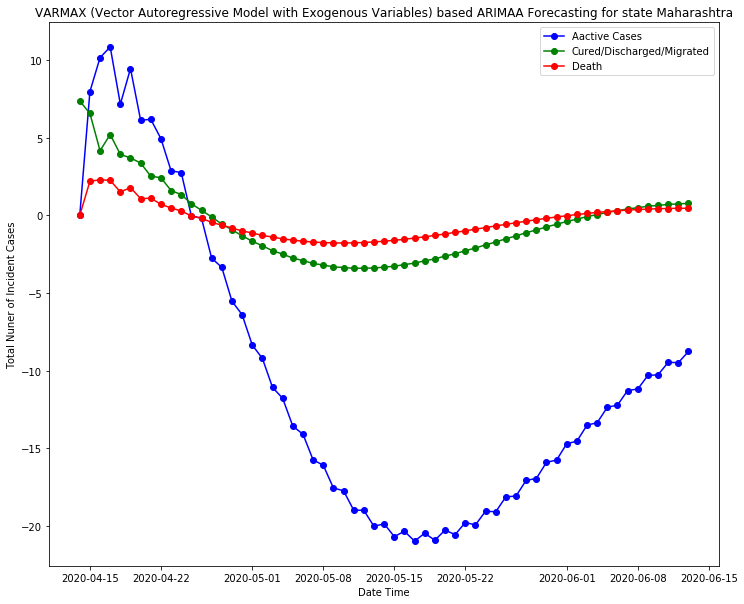

In [106]:
valid_index = pd.date_range(start=valid_dates[0], periods=61, freq='D')
pred = res.impulse_responses(60, orthogonalized=True)

a_vr_Series = pd.Series(pred['Active Cases'].values, index=valid_index)
c_vr_Series = pd.Series(pred['Cured/Discharged/Migrated'].values, index=valid_index)
d_vr_Series = pd.Series(pred['Death'].values, index=valid_index)

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(a_vr_Series, marker='o',color='blue',label ="Aactive Cases")
plt.plot(c_vr_Series, marker='o',color='green',label ="Cured/Discharged/Migrated")
plt.plot(d_vr_Series, marker='o',color='red',label ="Death")

plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Total Nuner of Incident Cases')
plt.title("VARMAX (Vector Autoregressive Model with Exogenous Variables) based ARIMAA Forecasting for state " + stateName)

# Time Series Regression using tslearn

In [107]:
df_per_State_features = df_state_recs[9]

train_ml=df_per_State_features.iloc[:int(df_per_State_features.shape[0]*0.70)]
valid_ml=df_per_State_features.iloc[int(df_per_State_features.shape[0]*0.70):]

trainActiveCases =totActiveCases[0:int(df_per_State_features.shape[0]*0.70)]
validActiveCases=totActiveCases[int(df_per_State_features.shape[0]*0.70):]

train_dates = df_per_State_features['Date'].iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_dates = df_per_State_features['Date'].iloc[int(df_per_State_sel_features.shape[0]*0.70):].values

ml_all_f =df_per_State_sel_features.values
train_ml_all_f =df_per_State_sel_features.iloc[:int(df_per_State_sel_features.shape[0]*0.70)].values
valid_ml_all_f =df_per_State_sel_features.iloc[int(df_per_State_sel_features.shape[0]*0.70):].values

In [108]:
reg = TimeSeriesSVR(kernel="gak", gamma="auto")
print(train_ml.columns)

X_train = train_ml[['Cured/Discharged/Migrated', 'Death', 'Total Confirmed cases', 'LiteracyRate', 'PopulationDensity', 'ElderlyRate',
       'DistrictsEffected', 'NoRedZones', 'NoOrangeZones', 'NoGreenZones',
       'InternationalAirports', 'IntAirportPassenger', 'StateHospitals',
       'StateHospitalBeds', 'StateHospitalICUs', 'StateHospitalVentilators']]


X_test =  valid_ml[['Cured/Discharged/Migrated', 'Death', 'Total Confirmed cases', 'LiteracyRate', 'PopulationDensity', 'ElderlyRate',
       'DistrictsEffected', 'NoRedZones', 'NoOrangeZones', 'NoGreenZones',
       'InternationalAirports', 'IntAirportPassenger', 'StateHospitals',
       'StateHospitalBeds', 'StateHospitalICUs', 'StateHospitalVentilators']]


X = train_ml[[ 'Total Confirmed cases']]


y =  valid_ml[['Total Confirmed cases']]


tseries_reg = reg.fit(X_train, trainActiveCases)
tseries_pred = tseries_reg.predict(X_test)

#print(tseries_reg.support_vectors_time_series_(X_test))

print(tseries_pred)

Index(['Unnamed: 0', 'index', 'Date', 'Name of State / UT',
       'Cured/Discharged/Migrated', 'Death', 'Total Confirmed cases',
       'Active Cases', 'LiteracyRate', 'PopulationDensity', 'ElderlyRate',
       'DistrictsEffected', 'NoRedZones', 'NoOrangeZones', 'NoGreenZones',
       'InternationalAirports', 'IntAirportPassenger', 'StateHospitals',
       'StateHospitalBeds', 'StateHospitalICUs', 'StateHospitalVentilators',
       'Rate_per_3_days', 'Rate_per_5_days', 'Rate_per_7_days',
       'Rate_per_15_days', 'Rate_per_21_days', 'is_curve_flattened',
       'Days Since'],
      dtype='object')


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/lib/python3.7/site-packages/tslearn/utils.py:63: UserWarning:

2-Dimensional data passed. Assuming these are 36 1-dimensional timeseries



[128.11280713 127.20023671 126.60015247 125.96300738 125.74933093
 125.29909149 124.89347566 124.76537446 124.71351086 124.70289824
 124.69927763 124.69906379 124.69900055 124.69899908 124.69899888
 124.69899887]


/anaconda3/lib/python3.7/site-packages/tslearn/utils.py:63: UserWarning:

2-Dimensional data passed. Assuming these are 16 1-dimensional timeseries



In [109]:
model_scores.append(np.sqrt(mean_squared_error(validActiveCases,tseries_pred)))
print("Root Mean Square Error for Tslearn Model: ",np.sqrt(mean_squared_error(validActiveCases,tseries_pred)))

Root Mean Square Error for Tslearn Model:  4586.294801879899


Text(0.5, 1.0, 'Multi Input Feature Active Cases Forecasting for state Maharashtra')

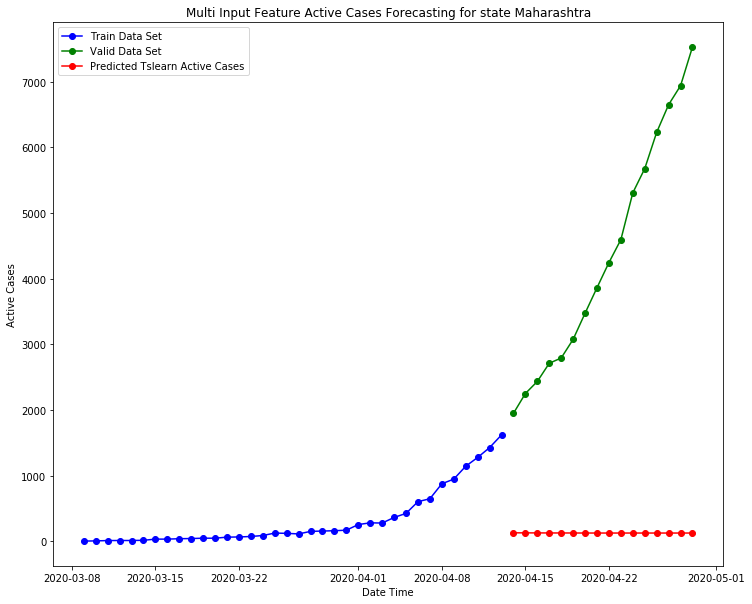

In [110]:
index= pd.date_range(start=train_dates[0], periods=len(train_dates), freq='D')
valid_index = pd.date_range(start=valid_dates[0], periods=len(valid_dates), freq='D')

train_active =  pd.Series(train_ml['Active Cases'].values, index)
valid_active =  pd.Series(valid_ml['Active Cases'].values, valid_index)
pred_active =  pd.Series(tseries_pred, valid_index)

f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(train_active, marker='o',color='blue',label ="Train Data Set")
plt.plot(valid_active, marker='o',color='green',label ="Valid Data Set")
plt.plot(pred_active, marker='o',color='red',label ="Predicted Tslearn Active Cases")

plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Active Cases')
plt.title("Multi Input Feature Active Cases Forecasting for state " + stateName)